In [ ]:
# 2) Matplotlib에 새 폰트를 등록하고 기본 폰트로 지정
import matplotlib as mpl
from matplotlib import font_manager as fm

# Nanum 폰트 경로에서 ttf를 찾아 등록
nanum_paths = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'], fontext='ttf')
for p in nanum_paths:
    fm.fontManager.addfont(p)

mpl.rcParams['font.family'] = 'NanumGothic'   # 혹은 'NanumBarunGothic' 등 등록된 이름이면 모두 가능
mpl.rcParams['axes.unicode_minus'] = False    # 마이너스 깨짐 방지


In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI goorm project1/dataset/train.csv', encoding='utf-8')
bi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI goorm project1/dataset/building_info.csv', encoding='utf-8')

KEY = '건물번호'  # ← 실제 키 컬럼명으로 바꿔줘 (예: 'building_id')
df = train.merge(bi, on=KEY, how='left')

target = '전력소비량(kWh)'  # 타깃 컬럼명
df['일시'] = pd.to_datetime(df['일시'], errors='coerce')

# 숫자/범주 컬럼 분리
num_cols = df.select_dtypes('number').columns.tolist()
if target in num_cols:  # 타깃은 따로 관리
    num_cols.remove(target)
cat_cols = df.select_dtypes(['object', 'category']).columns.tolist()

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.7 MB/s eta 0:00:00


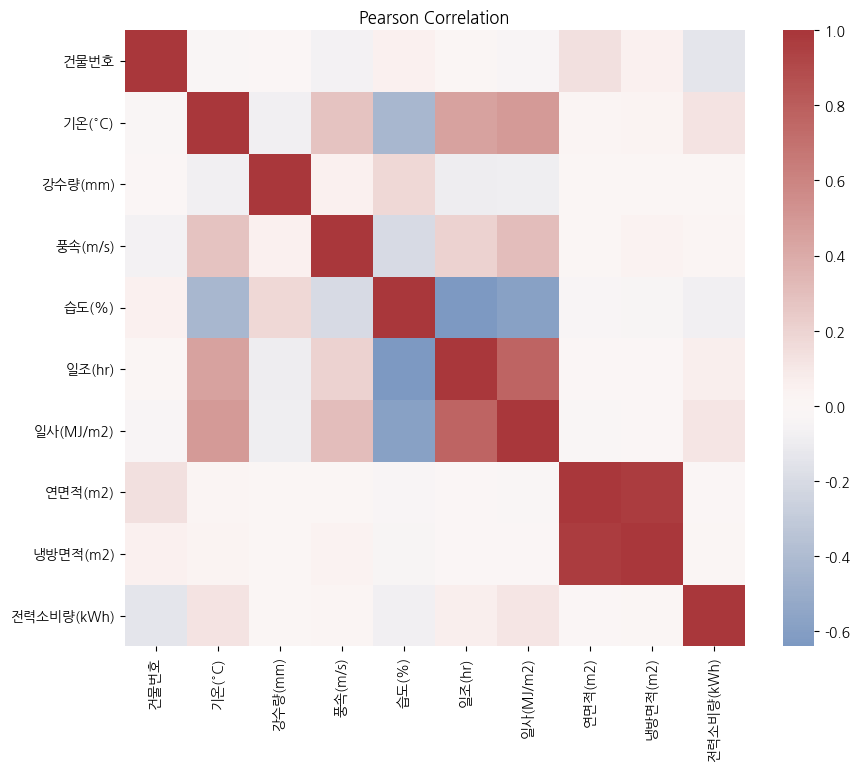

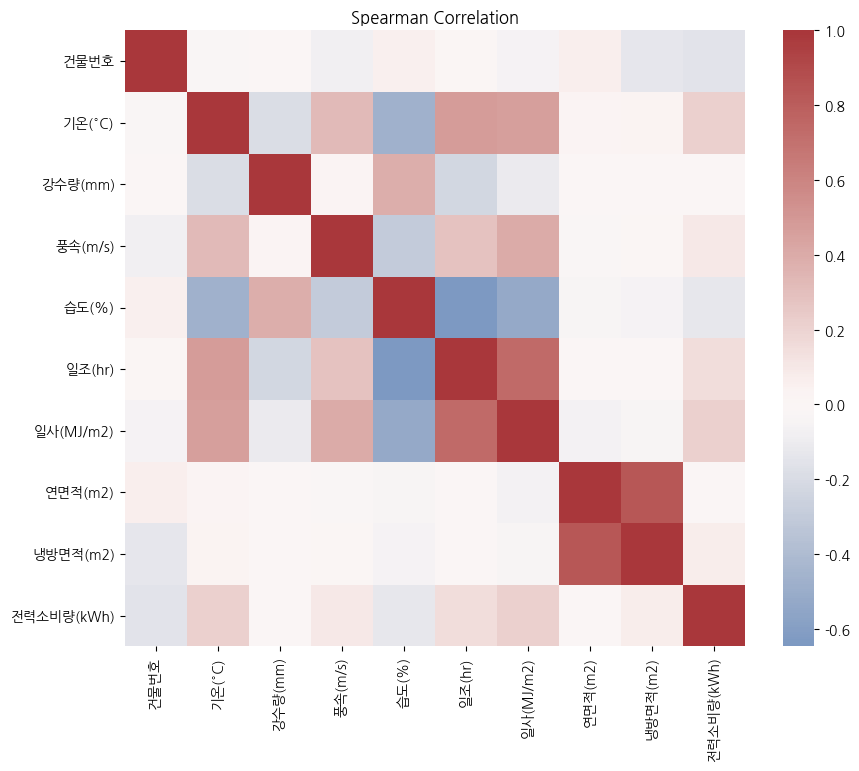

In [ ]:
import seaborn as sns, numpy as np, matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols+[target]].corr(method='pearson'), center=0, cmap='vlag')
plt.title('Pearson Correlation')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols+[target]].corr(method='spearman'), center=0, cmap='vlag')
plt.title('Spearman Correlation')
plt.show()


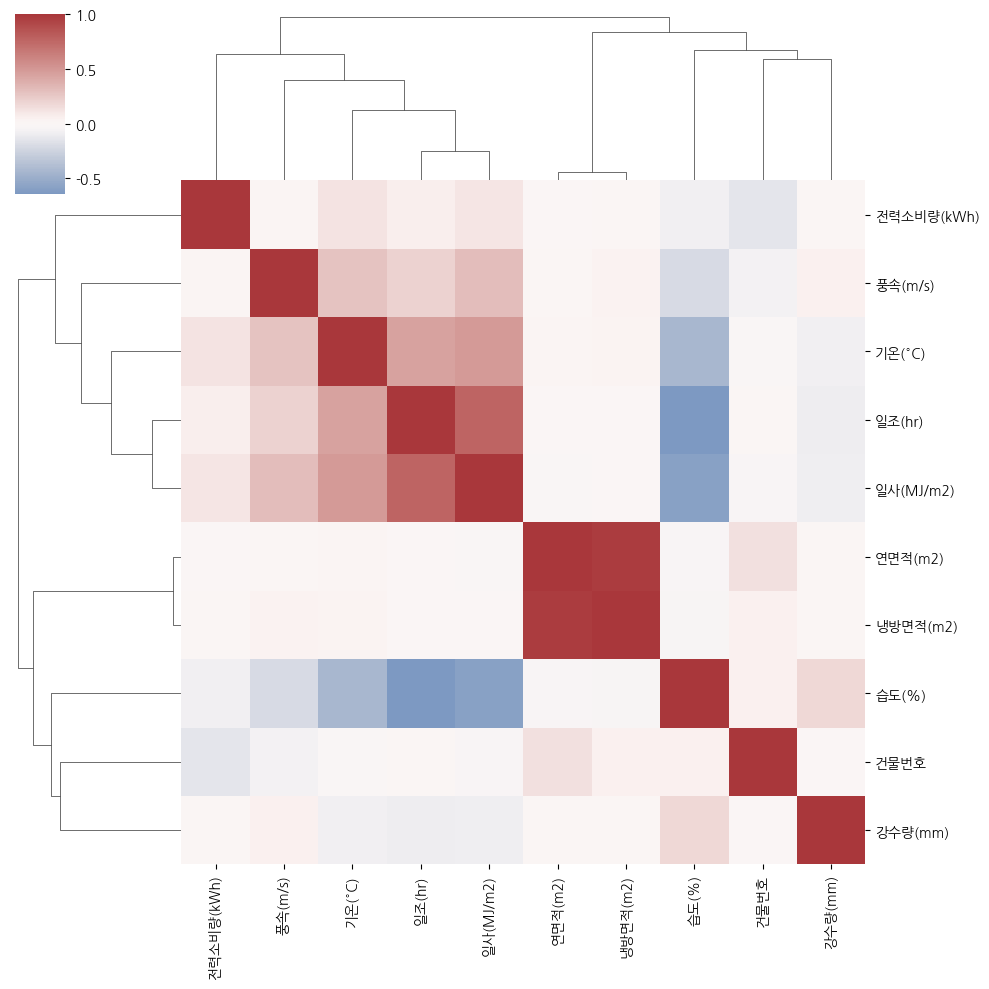

In [ ]:
sns.clustermap(df[num_cols+[target]].corr(), cmap='vlag', center=0, figsize=(10,10))


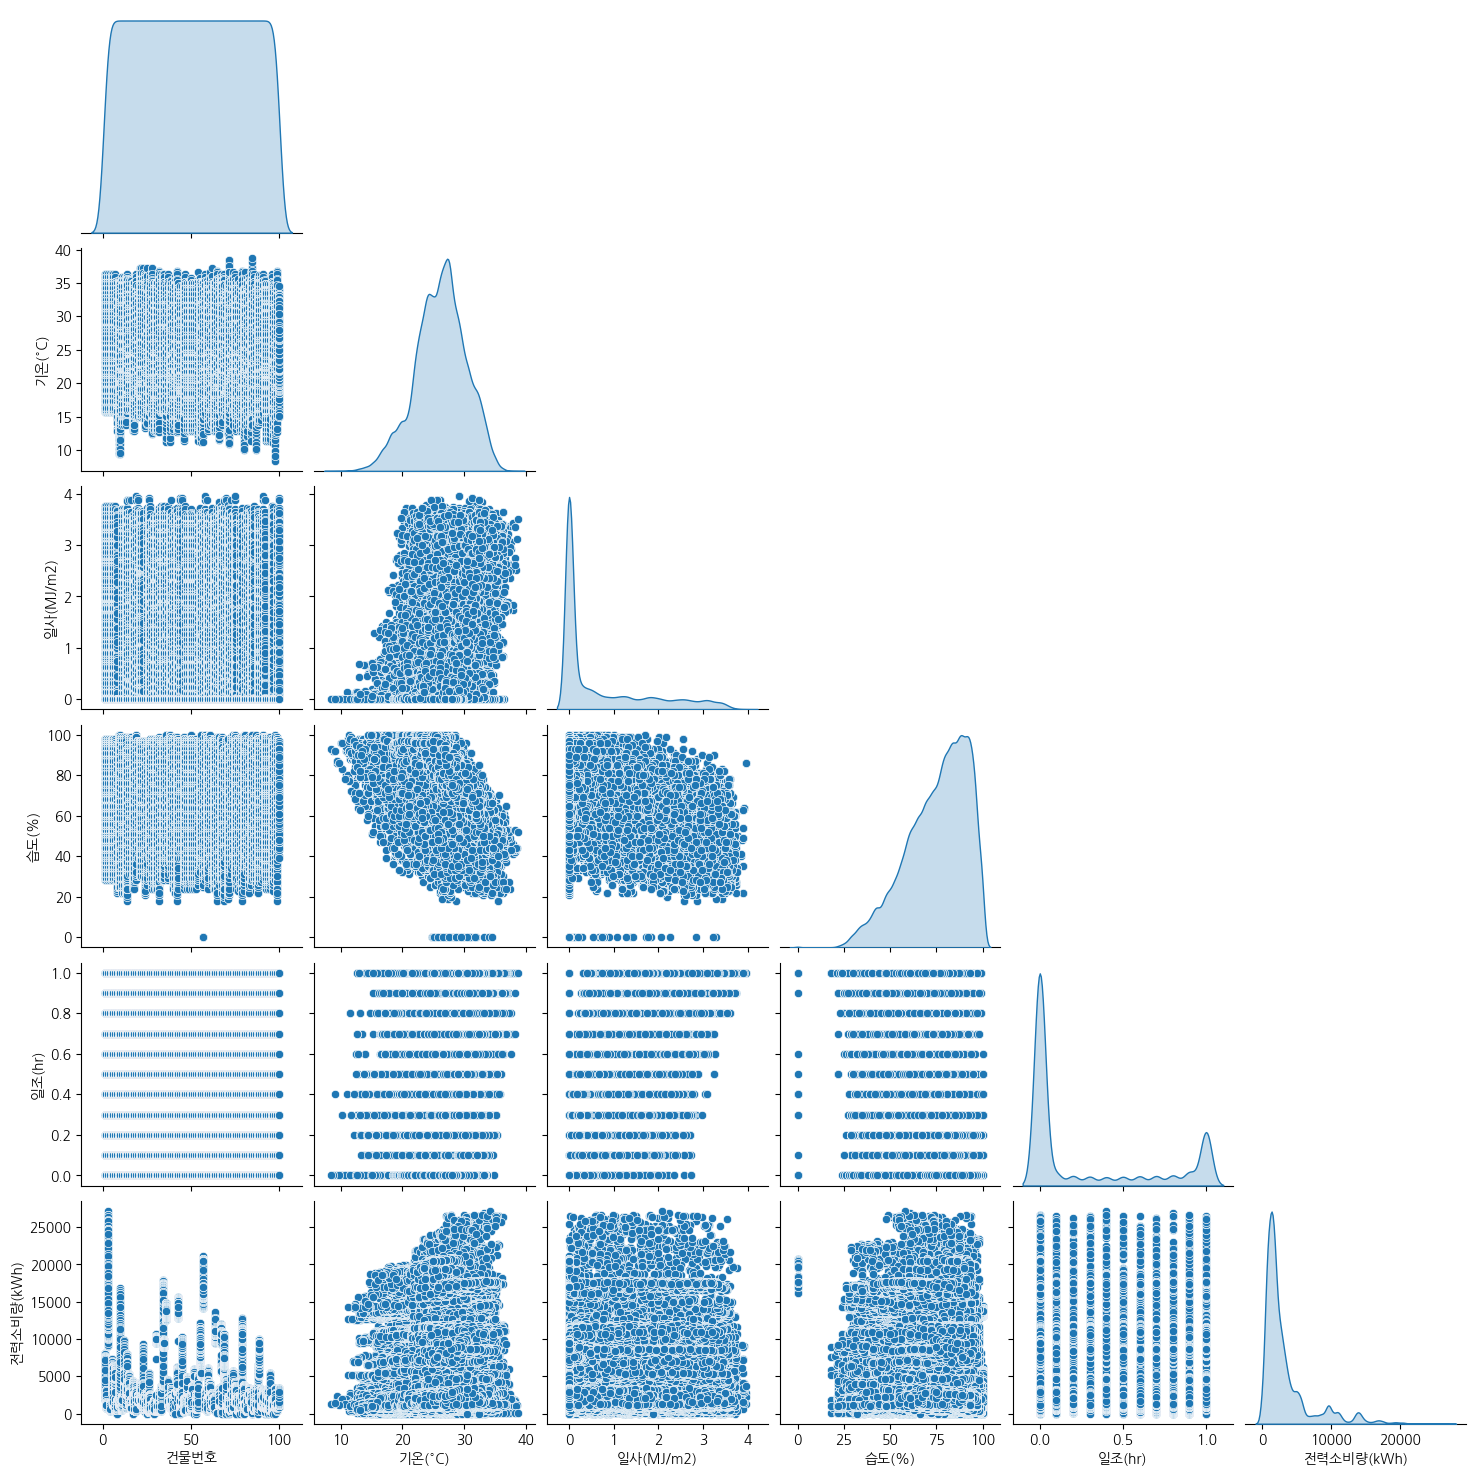

In [ ]:
topk = (df[num_cols].corrwith(df[target])
        .abs().sort_values(ascending=False).head(5).index.tolist())
sns.pairplot(df, vars=topk+[target], hue=None, corner=True, diag_kind='kde')


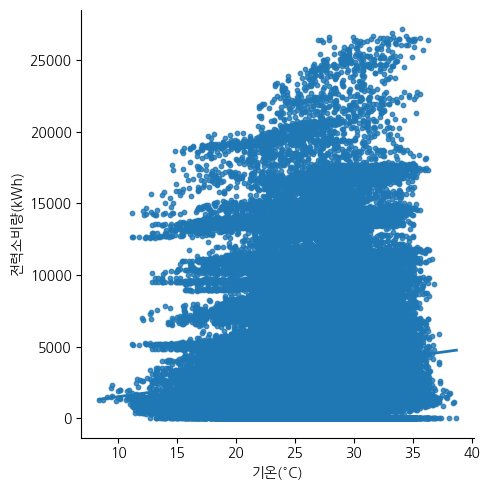

In [ ]:
sns.lmplot(data=df, x='기온(°C)', y=target, scatter_kws={'s':10}, line_kws={'lw':2})


<Axes: xlabel='기온(°C)', ylabel='전력소비량(kWh)'>

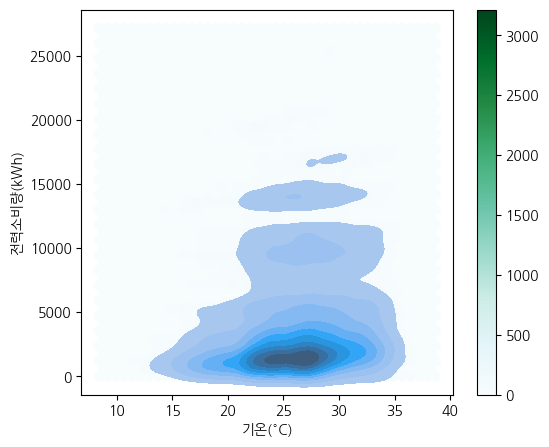

In [ ]:
df.plot(kind='hexbin', x='기온(°C)', y=target, gridsize=40, figsize=(6,5), sharex=False)
sns.kdeplot(data=df, x='기온(°C)', y=target, fill=True, thresh=0.05)


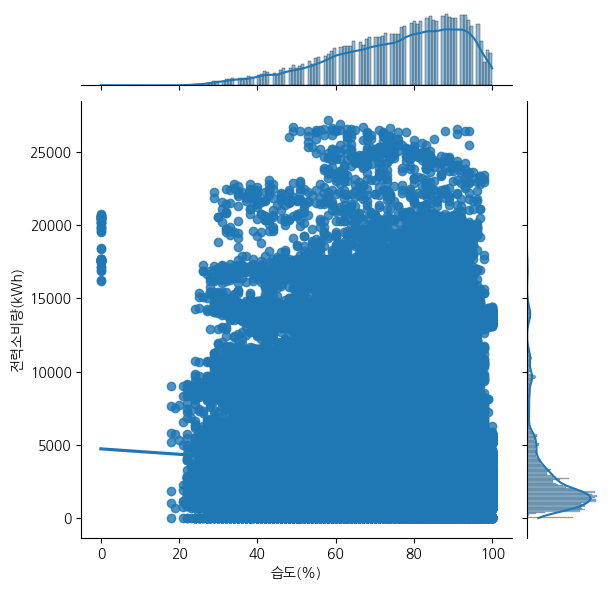

In [ ]:
sns.jointplot(data=df, x='습도(%)', y=target, kind='reg')


<Axes: xlabel='건물유형', ylabel='전력소비량(kWh)'>

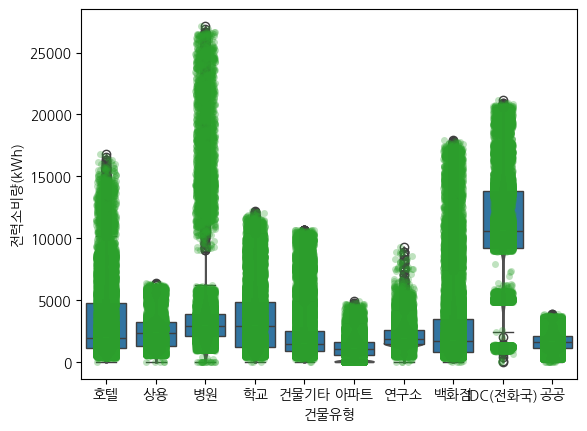

In [ ]:
sns.boxplot(data=df, x='건물유형', y=target)
sns.violinplot(data=df, x='건물유형', y=target, cut=0)
sns.stripplot(data=df, x='건물유형', y=target, alpha=0.3, jitter=0.2)


위의 그래프를 보고 건물유형벌 이상치가 너무 많이 따로 확인해야 겠다고 생각함

,count,mean_gfa,median_gfa,mean_cool,median_cool
건물유형,,,,,
건물기타,20400,434137.068900,106985.500,262467.462500,60885.500
학교,20400,351290.481300,342560.845,190519.879000,177814.750
아파트,18360,304948.496667,300496.816,205633.047667,233263.000
병원,18360,157621.507778,99347.350,117535.680000,72627.980
호텔,20400,148146.785000,97167.750,103288.628000,68037.655
백화점,32640,133947.159375,120025.325,63127.165000,53329.000
공공,16320,133799.302500,123575.830,54304.158750,54222.000
상용,20400,81677.582000,42459.350,38479.131000,21118.675
연구소,18360,74157.081111,72573.530,48866.634444,44576.270


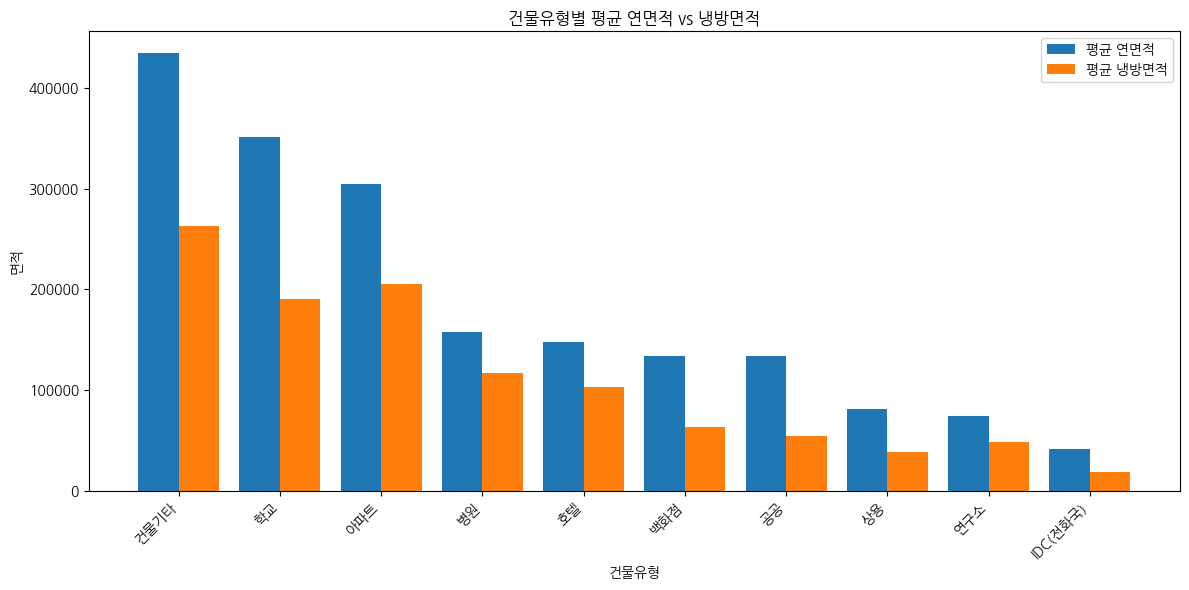

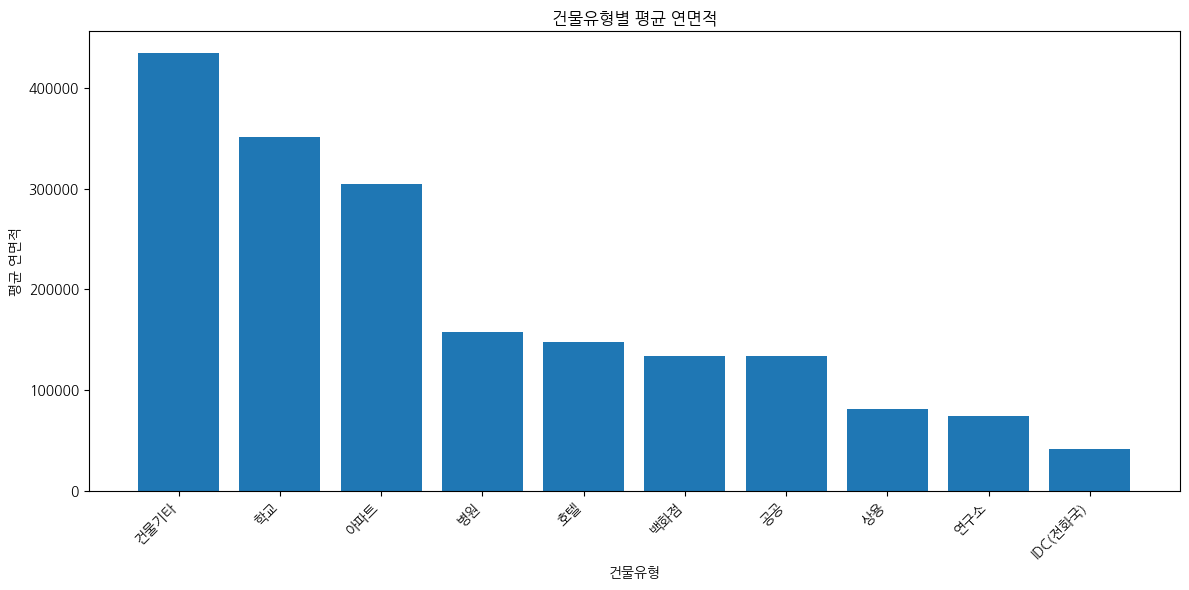

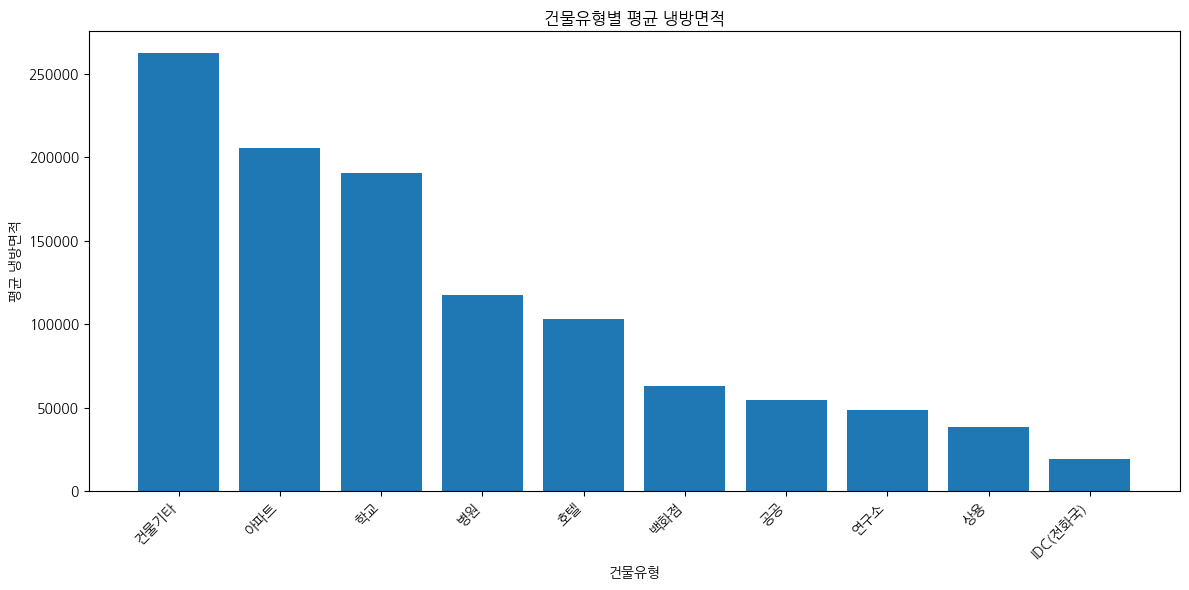

/tmp/ipython-input-554105664.py:130: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_gfa, labels=[str(t) for t in order], showfliers=False)


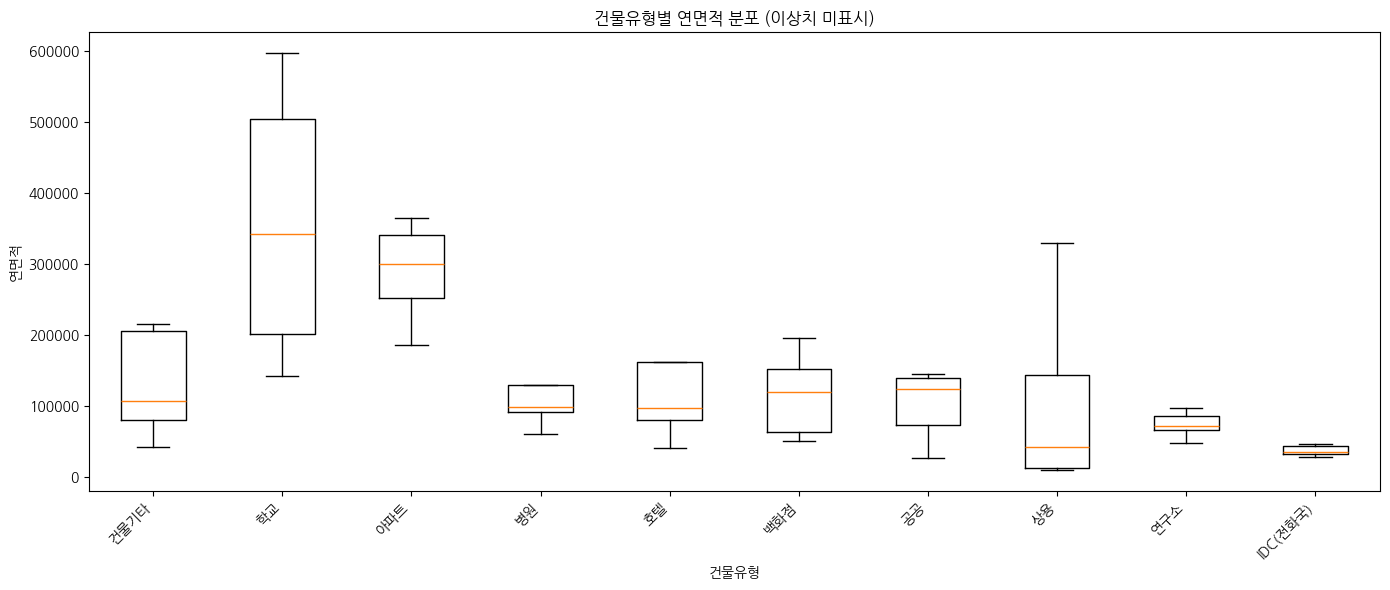

/tmp/ipython-input-554105664.py:141: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_cool, labels=[str(t) for t in order], showfliers=False)


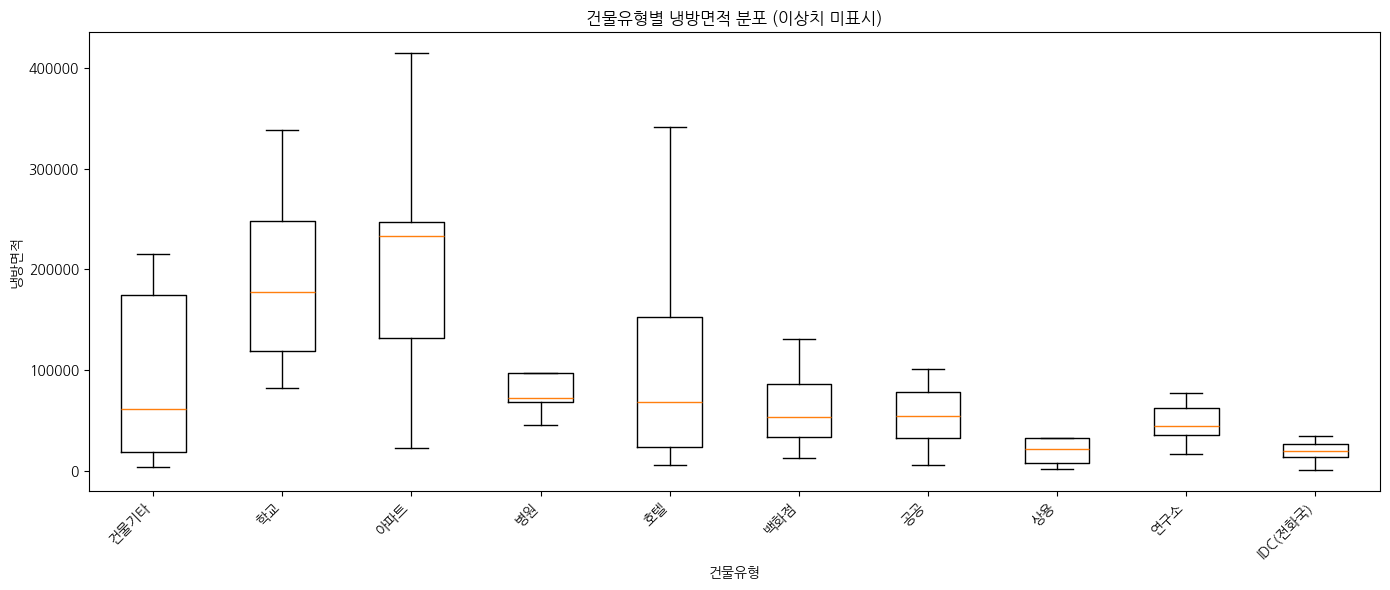

✅ 저장 경로: ./plots


In [ ]:
# =========================================
# 건물유형별 연면적/냉방면적 그래프 (대체 코드)
# - 외부 유틸 불필요, 표는 IPython.display로 표시
# - 한글 폰트 자동 설정(Colab/Linux/Windows/macOS)
# =========================================
import os, re
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from IPython.display import display

# ---------- 0) 한글 폰트 설정 ----------
def setup_korean_font():
    # Colab/Linux에서 Nanum 폰트가 설치돼 있다면 등록
    nanum_dir = "/usr/share/fonts/truetype/nanum"
    if os.path.isdir(nanum_dir):
        for p in fm.findSystemFonts(fontpaths=[nanum_dir], fontext='ttf'):
            fm.fontManager.addfont(p)

    installed = {f.name for f in fm.fontManager.ttflist}
    for name in ["NanumGothic", "Malgun Gothic", "AppleGothic",
                 "Noto Sans CJK KR", "Noto Sans CJK", "NotoSansKR-Regular"]:
        if name in installed:
            mpl.rcParams["font.family"] = name
            break
    mpl.rcParams["axes.unicode_minus"] = False

setup_korean_font()

# ---------- 1) 경로/인코딩 robust 로딩 ----------
def find_first_existing(paths):
    for p in paths:
        if os.path.exists(p):
            return p
    raise FileNotFoundError(paths)

train =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI goorm project1/dataset/train.csv', encoding='utf-8')
bi   =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI goorm project1/dataset/building_info.csv', encoding='utf-8')


# ---------- 2) 컬럼 자동 탐색 ----------
def find_col(cols, patterns):
    for pat in patterns:
        for c in cols:
            if re.search(pat, str(c)):
                return c
    return None

key_train = find_col(train.columns, [r"건물번호", r"building[_\s-]*id", r"건물\s*ID", r"bldg[_\s-]*id"])
key_bi    = find_col(bi.columns,    [r"건물번호", r"building[_\s-]*id", r"건물\s*ID", r"bldg[_\s-]*id"])
btype_col = find_col(bi.columns,    [r"건물\s*유형", r"건물\s*용도", r"유형", r"용도"])
gfa_col   = find_col(bi.columns,    [r"연\s*면\s*적", r"총\s*면\s*적", r"연면적", r"GFA", r"floor\s*area"])
cool_col  = find_col(bi.columns,    [r"냉\s*방\s*면\s*적", r"냉방면적", r"cool.*area"])

missing = []
if key_train is None or key_bi is None: missing.append("병합키(건물번호/building_id)")
if btype_col is None: missing.append("건물유형")
if gfa_col   is None: missing.append("연면적")
if cool_col  is None: missing.append("냉방면적")
if missing:
    raise ValueError(f"다음 컬럼을 찾지 못했습니다: {missing}\n"
                     f"building_info 컬럼들: {list(bi.columns)}\ntrain 컬럼들: {list(train.columns)}")

# ---------- 3) 병합 & 전처리 ----------
df = pd.merge(train, bi[[key_bi, btype_col, gfa_col, cool_col]],
              left_on=key_train, right_on=key_bi, how="left")

for c in [gfa_col, cool_col]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# ---------- 4) 요약표 ----------
summary = (df.groupby(btype_col)[[gfa_col, cool_col]]
             .agg(count=("{}".format(gfa_col), "count"),
                  mean_gfa=(gfa_col, "mean"),
                  median_gfa=(gfa_col, "median"),
                  mean_cool=(cool_col, "mean"),
                  median_cool=(cool_col, "median"))
             .sort_values("mean_gfa", ascending=False))

display(summary.head(30))  # 상위 30개 유형 미리보기

# ---------- 5) 그래프 ----------
os.makedirs("plots", exist_ok=True)

# (A) 그룹형 막대그래프: 유형별 평균 연면적 vs 냉방면적
means = df.groupby(btype_col)[[gfa_col, cool_col]].mean().dropna()
means = means.sort_values(gfa_col, ascending=False)
x = np.arange(len(means))
w = 0.4

plt.figure(figsize=(12,6))
plt.bar(x - w/2, means[gfa_col].values, width=w, label="평균 연면적")
plt.bar(x + w/2, means[cool_col].values, width=w, label="평균 냉방면적")
plt.title("건물유형별 평균 연면적 vs 냉방면적")
plt.xlabel("건물유형")
plt.ylabel("면적")
plt.xticks(x, means.index.astype(str), rotation=45, ha="right")
plt.legend()
plt.tight_layout()

plt.show()

# (B) 막대그래프: 평균 연면적
plt.figure(figsize=(12,6))
plt.bar(means.index.astype(str), means[gfa_col].values)
plt.title("건물유형별 평균 연면적")
plt.xlabel("건물유형"); plt.ylabel("평균 연면적")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

# (C) 막대그래프: 평균 냉방면적
means_cool = means.sort_values(cool_col, ascending=False)
plt.figure(figsize=(12,6))
plt.bar(means_cool.index.astype(str), means_cool[cool_col].values)
plt.title("건물유형별 평균 냉방면적")
plt.xlabel("건물유형"); plt.ylabel("평균 냉방면적")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

# (D) 박스플롯: 분포(연면적)
order = means.index.tolist()
box_gfa = [df.loc[df[btype_col]==t, gfa_col].dropna().values for t in order]
plt.figure(figsize=(14,6))
plt.boxplot(box_gfa, labels=[str(t) for t in order], showfliers=False)
plt.title("건물유형별 연면적 분포 (이상치 미표시)")
plt.xlabel("건물유형"); plt.ylabel("연면적")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

# (E) 박스플롯: 분포(냉방면적)
box_cool = [df.loc[df[btype_col]==t, cool_col].dropna().values for t in order]
plt.figure(figsize=(14,6))
plt.boxplot(box_cool, labels=[str(t) for t in order], showfliers=False)
plt.title("건물유형별 냉방면적 분포 (이상치 미표시)")
plt.xlabel("건물유형"); plt.ylabel("냉방면적")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

print("✅ 저장 경로: ./plots")


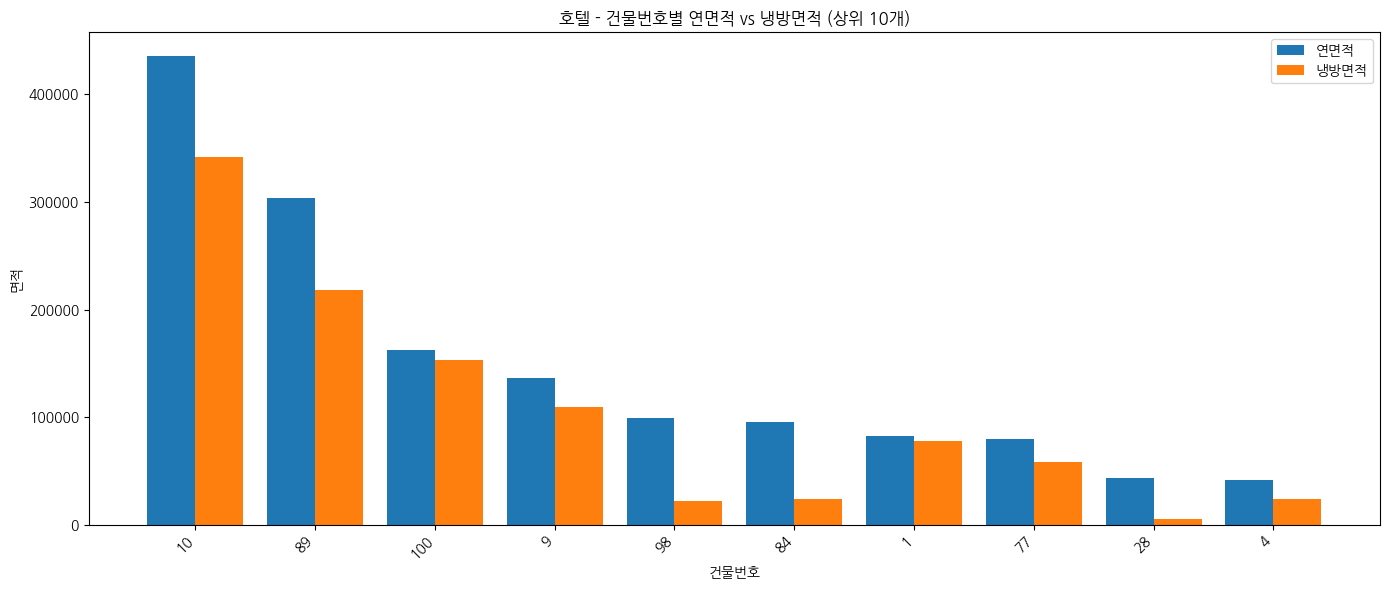

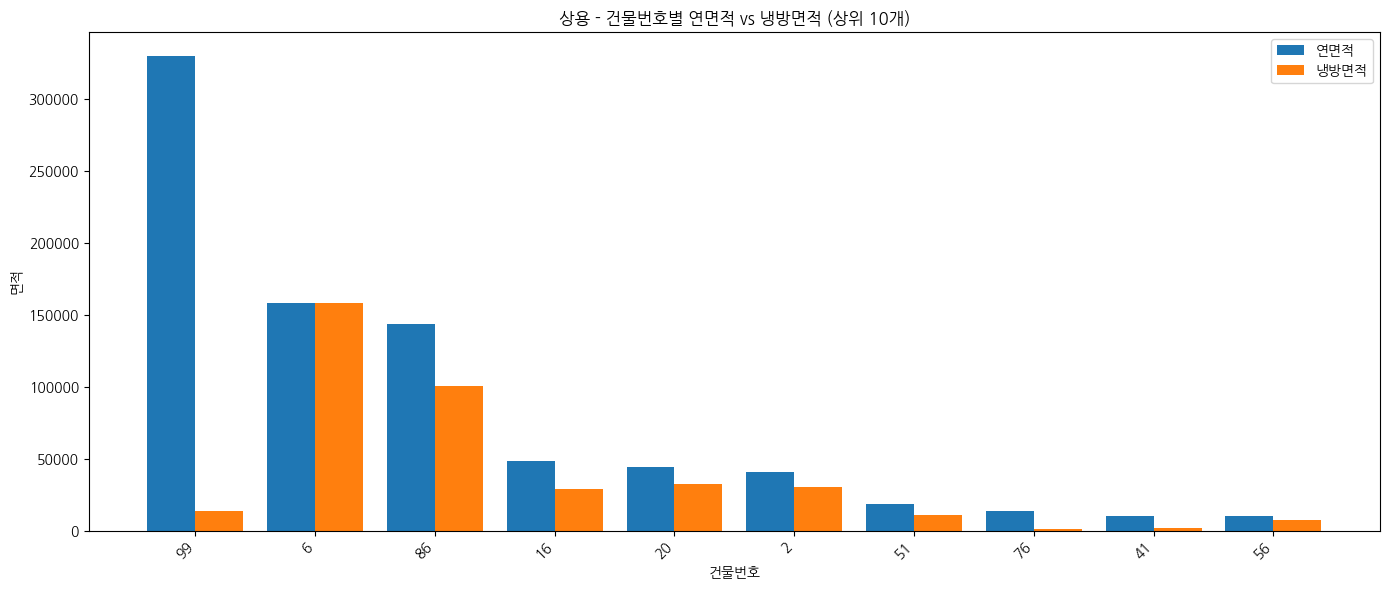

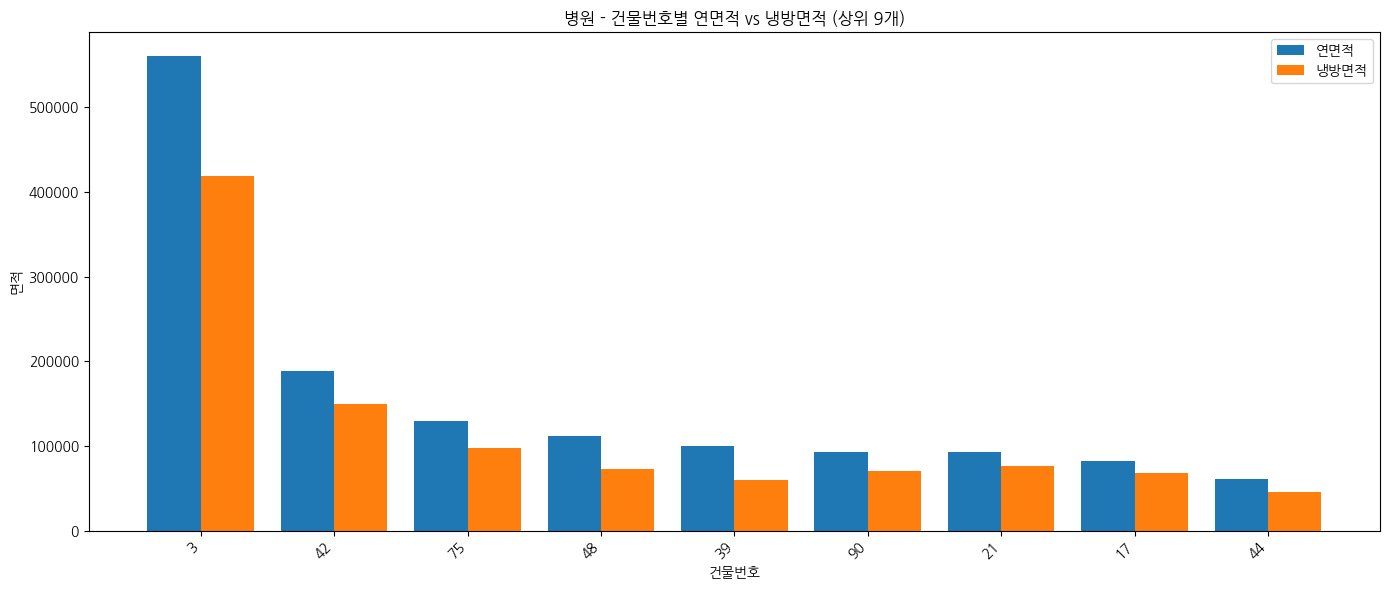

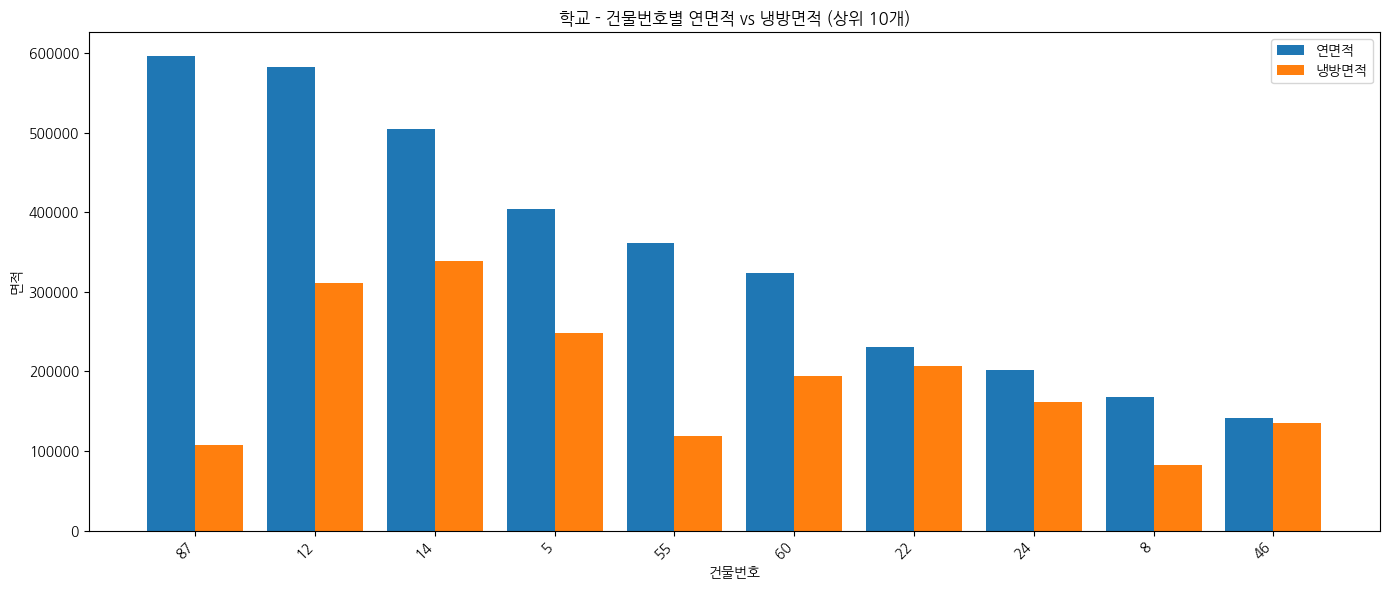

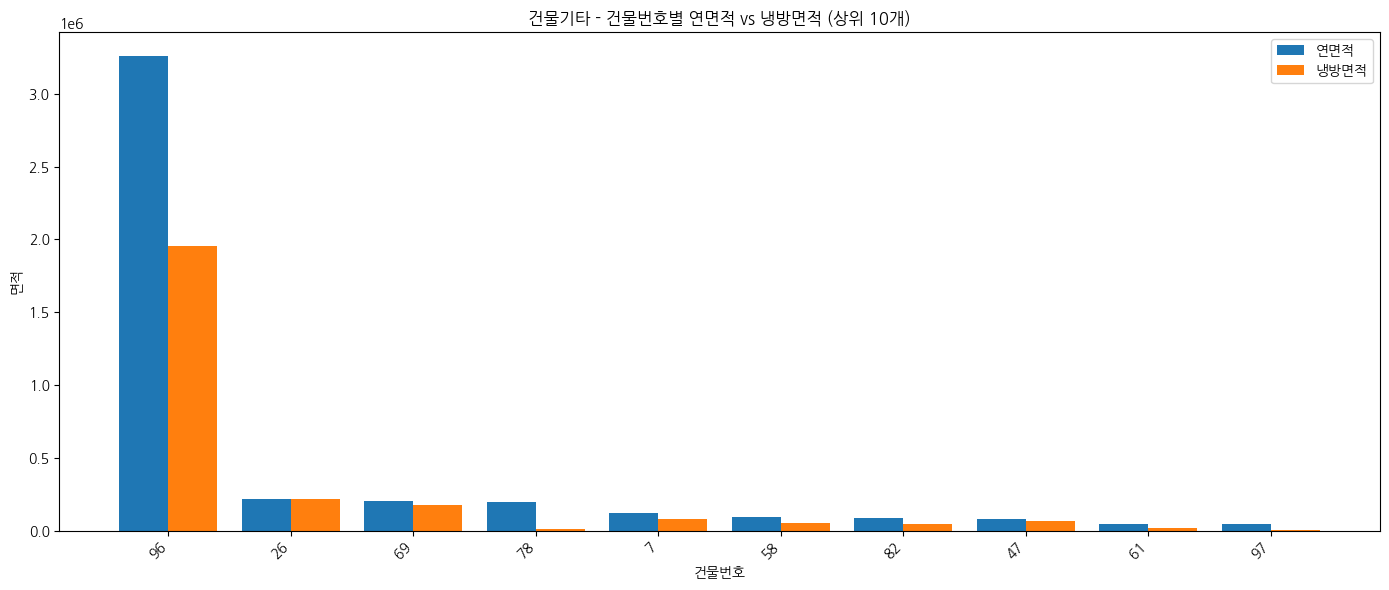

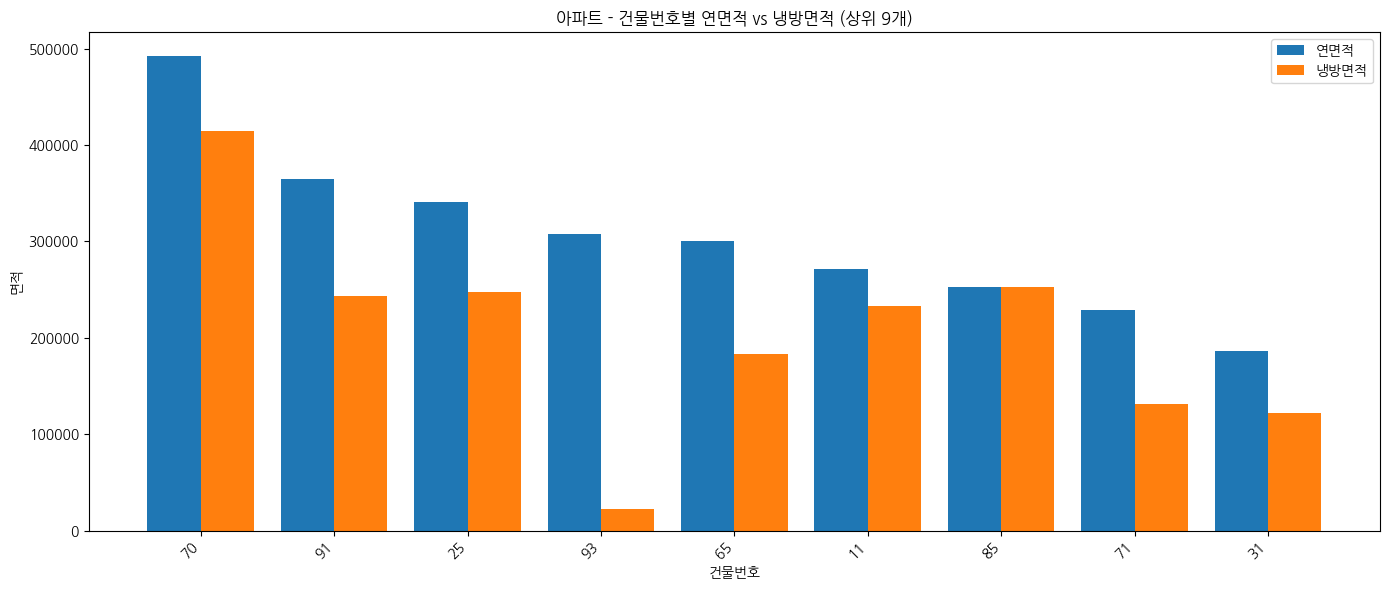

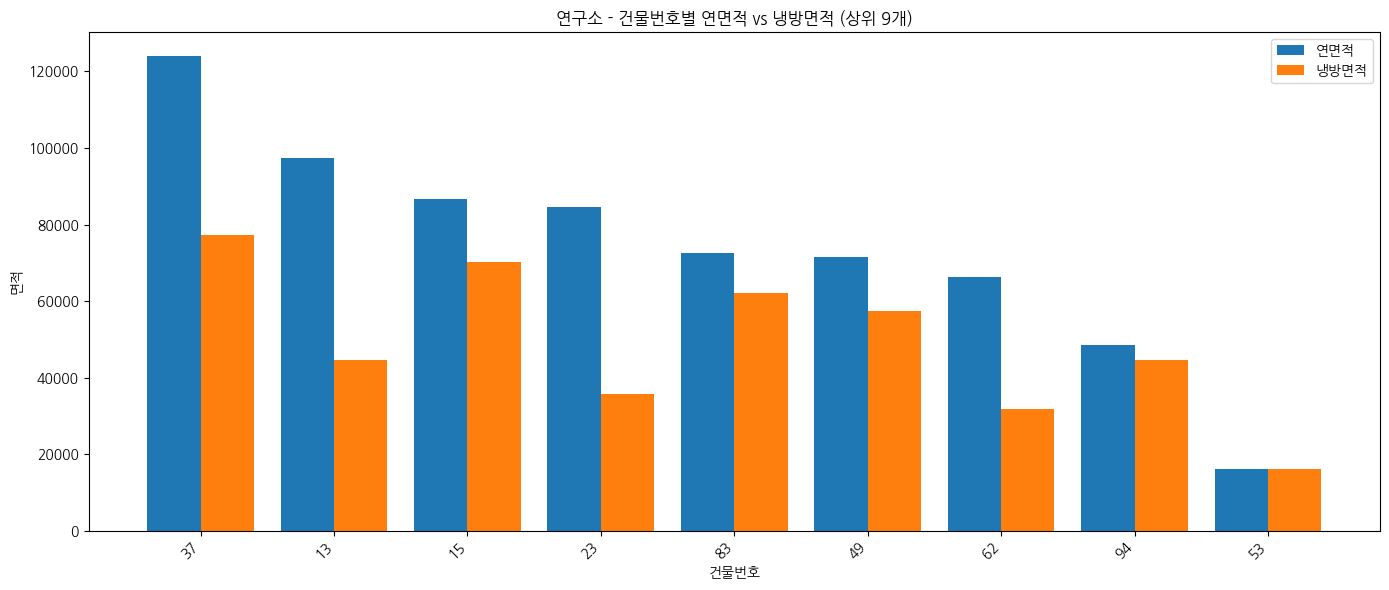

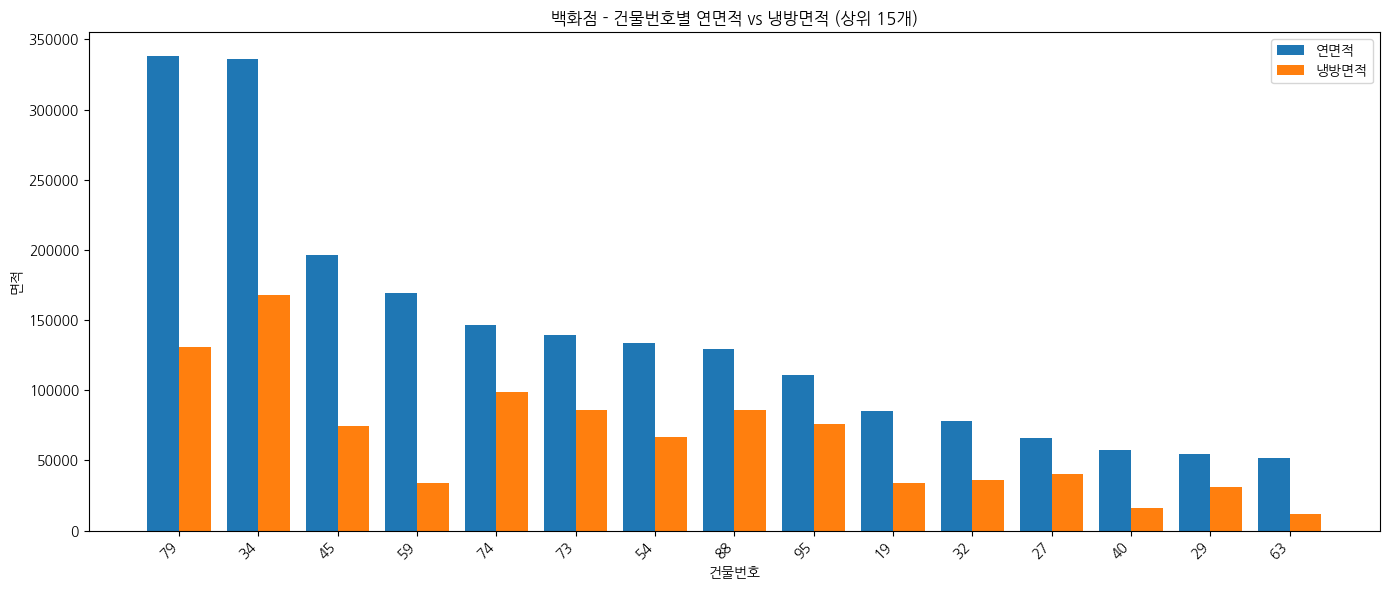

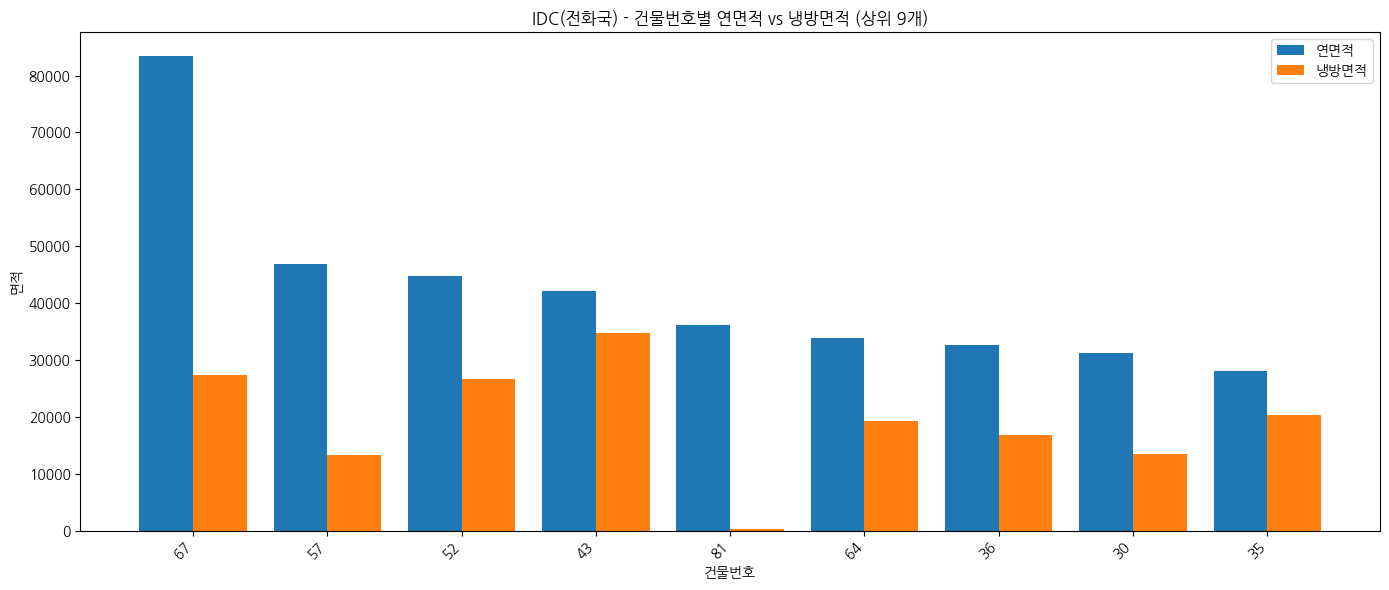

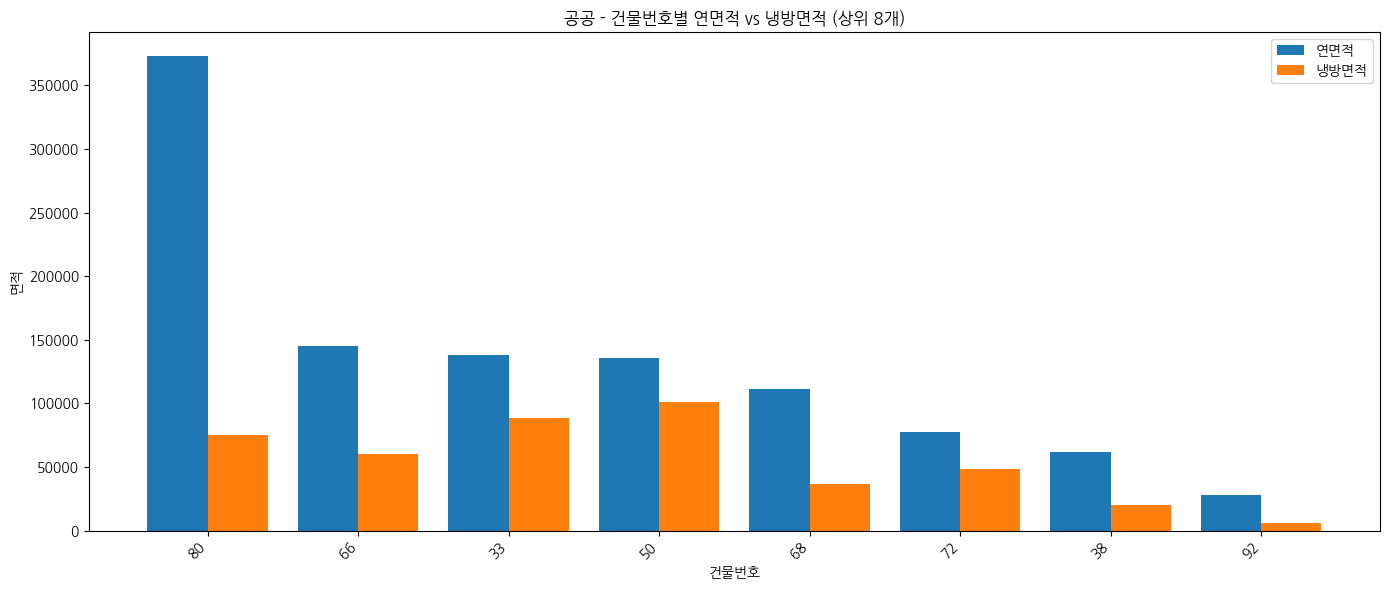

('/mnt/data/building_type_comparison_charts.zip',
 '/mnt/data/plots_by_type/per_type_top15_table.csv',
 '/mnt/data/plots_by_type')

In [ ]:
# -*- coding: utf-8 -*-
import os, re, io, zipfile
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# ---------- 0) Korean font (best-effort; no internet/apt here) ----------
installed = {f.name for f in fm.fontManager.ttflist}
for name in ["NanumGothic", "Malgun Gothic", "AppleGothic",
             "Noto Sans CJK KR", "Noto Sans CJK", "NotoSansKR-Regular"]:
    if name in installed:
        mpl.rcParams["font.family"] = name
        break
mpl.rcParams["axes.unicode_minus"] = False

# ---------- 1) Load building_info ----------
def read_csv_robust(path):
    for enc in ["utf-8", "cp949", "euc-kr"]:
        try:
            return pd.read_csv(path, encoding=enc)
        except Exception:
            pass
    return pd.read_csv(path)


bi   =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI goorm project1/dataset/building_info.csv', encoding='utf-8')

# ---------- 2) Column detection ----------
def find_col(cols, patterns):
    for pat in patterns:
        for c in cols:
            if re.search(pat, str(c), flags=re.IGNORECASE):
                return c
    return None

bnum_col  = find_col(bi.columns, [r"건물번호", r"building[_\s-]*id", r"건물\s*ID", r"bldg[_\s-]*id"])
btype_col = find_col(bi.columns, [r"건물\s*유형", r"건물\s*용도", r"유형", r"용도", r"type"])
gfa_col   = find_col(bi.columns, [r"연\s*면\s*적", r"총\s*면\s*적", r"연면적", r"GFA", r"floor\s*area"])
cool_col  = find_col(bi.columns, [r"냉\s*방\s*면\s*적", r"냉방면적", r"cool.*area"])

missing = []
if bnum_col  is None: missing.append("건물번호/building_id")
if btype_col is None: missing.append("건물유형")
if gfa_col   is None: missing.append("연면적(GFA)")
if cool_col  is None: missing.append("냉방면적")
if missing:
    raise ValueError(f"다음 컬럼을 찾지 못했습니다: {missing}\n현재 컬럼: {list(bi.columns)}")

# ---------- 3) Prepare data ----------
df = bi[[bnum_col, btype_col, gfa_col, cool_col]].copy()
for c in [gfa_col, cool_col]:
    df[c] = pd.to_numeric(df[c].astype(str).str.replace(",", ""), errors="coerce")

# Drop rows with both NaN in metrics
df = df.dropna(subset=[gfa_col, cool_col], how="all")

# Ensure building number is string for labeling
df[bnum_col] = df[bnum_col].astype(str)

# ---------- 4) Per-type grouped bar charts (GFA vs Cooling) ----------
out_dir = "/mnt/data/plots_by_type"
os.makedirs(out_dir, exist_ok=True)

# Helper to slugify file names
def slug(s):
    s = str(s)
    s = re.sub(r"[^\w\-]+", "_", s, flags=re.UNICODE)
    return s[:60]

# Limit number of buildings per type to keep readability
TOP_N = 15

# Keep a manifest for CSV
manifest_rows = []

unique_types = df[btype_col].dropna().unique().tolist()

for t in unique_types:
    sub = df[df[btype_col] == t].copy()
    # Order by GFA (desc), use 0 for NaN
    sub["_sort_key"] = sub[gfa_col].fillna(0)
    sub = sub.sort_values("_sort_key", ascending=False).drop(columns=["_sort_key"])
    sub_top = sub.head(TOP_N)

    # Append to manifest
    for _, r in sub_top.iterrows():
        manifest_rows.append({
            "건물유형": t,
            "건물번호": r[bnum_col],
            "연면적": r[gfa_col],
            "냉방면적": r[cool_col]
        })

    # Build grouped bars
    x = np.arange(len(sub_top))
    w = 0.4

    plt.figure(figsize=(14, 6))
    plt.bar(x - w/2, sub_top[gfa_col].values, width=w, label="연면적")
    plt.bar(x + w/2, sub_top[cool_col].values, width=w, label="냉방면적")
    plt.title(f"{t} - 건물번호별 연면적 vs 냉방면적 (상위 {min(TOP_N, len(sub))}개)")
    plt.xlabel("건물번호")
    plt.ylabel("면적")
    plt.xticks(x, sub_top[bnum_col].astype(str).values, rotation=45, ha="right")
    plt.legend()
    plt.tight_layout()
    fname = f"{out_dir}/by_type_{slug(t)}.png"
    plt.savefig(fname, dpi=200)
    plt.show()

# ---------- 5) Save manifest CSV and ZIP all images ----------
manifest = pd.DataFrame(manifest_rows)
csv_path = f"{out_dir}/per_type_top{TOP_N}_table.csv"
manifest.to_csv(csv_path, index=False, encoding="utf-8-sig")

# Zip all PNGs + CSV
zip_path = "/mnt/data/building_type_comparison_charts.zip"
with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as zf:
    for fn in os.listdir(out_dir):
        zf.write(os.path.join(out_dir, fn), arcname=f"plots_by_type/{fn}")

zip_path, csv_path, out_dir


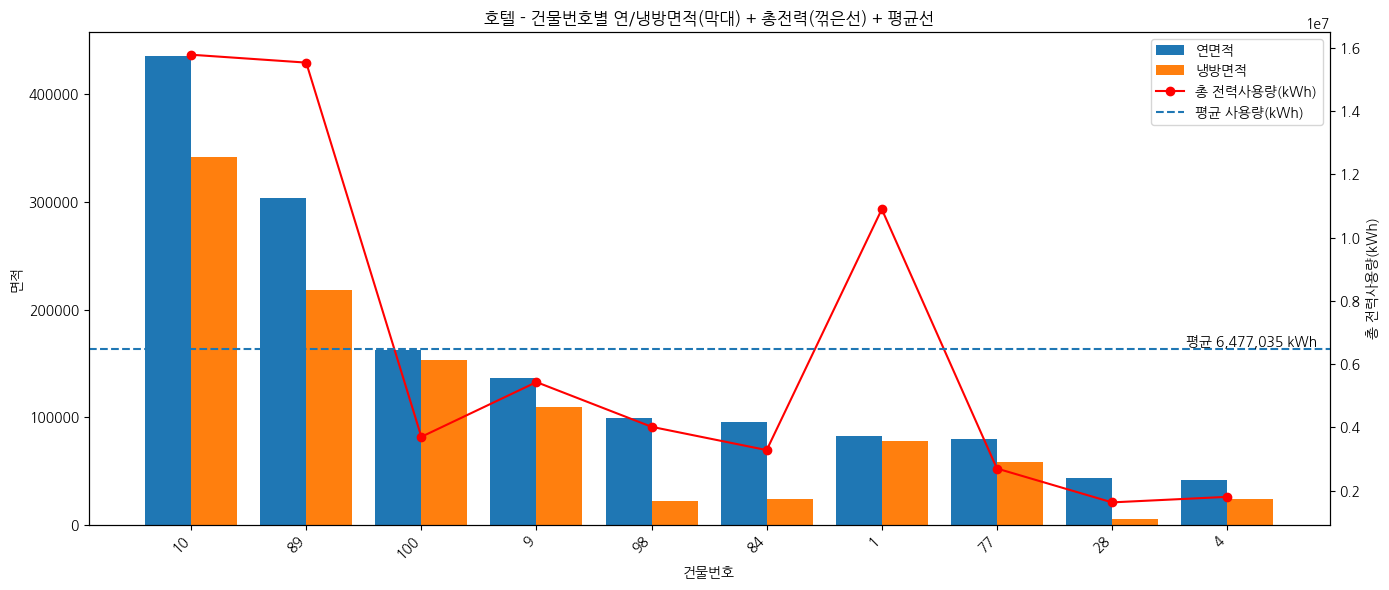

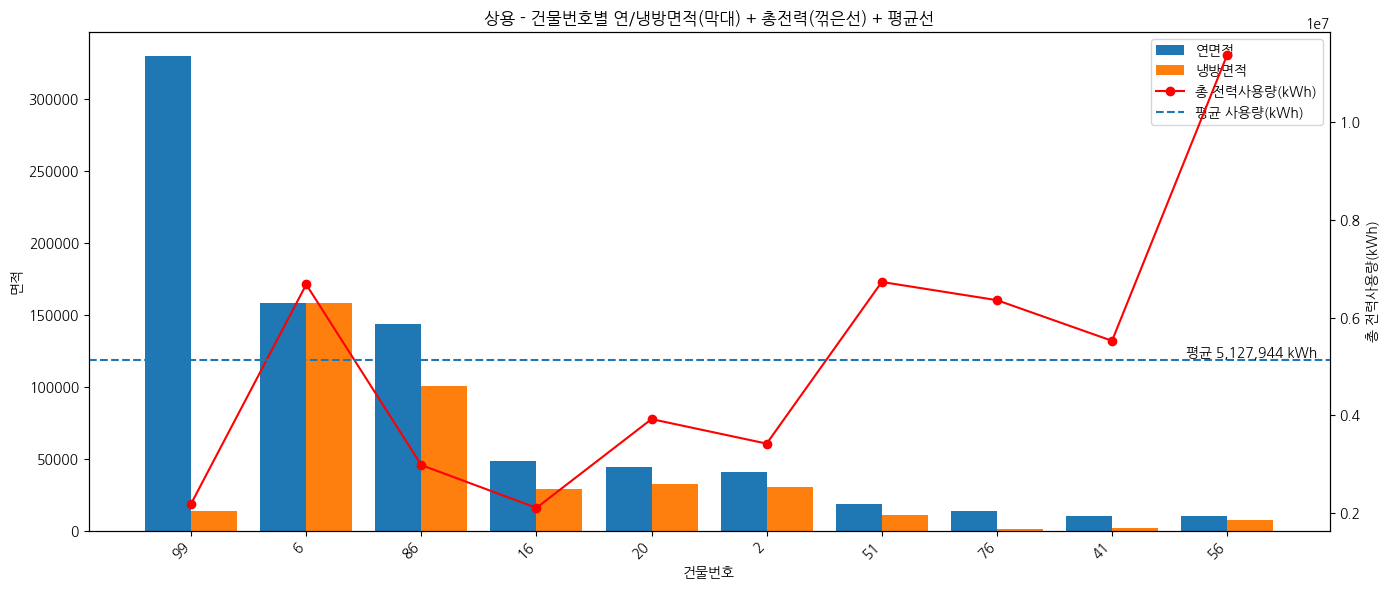

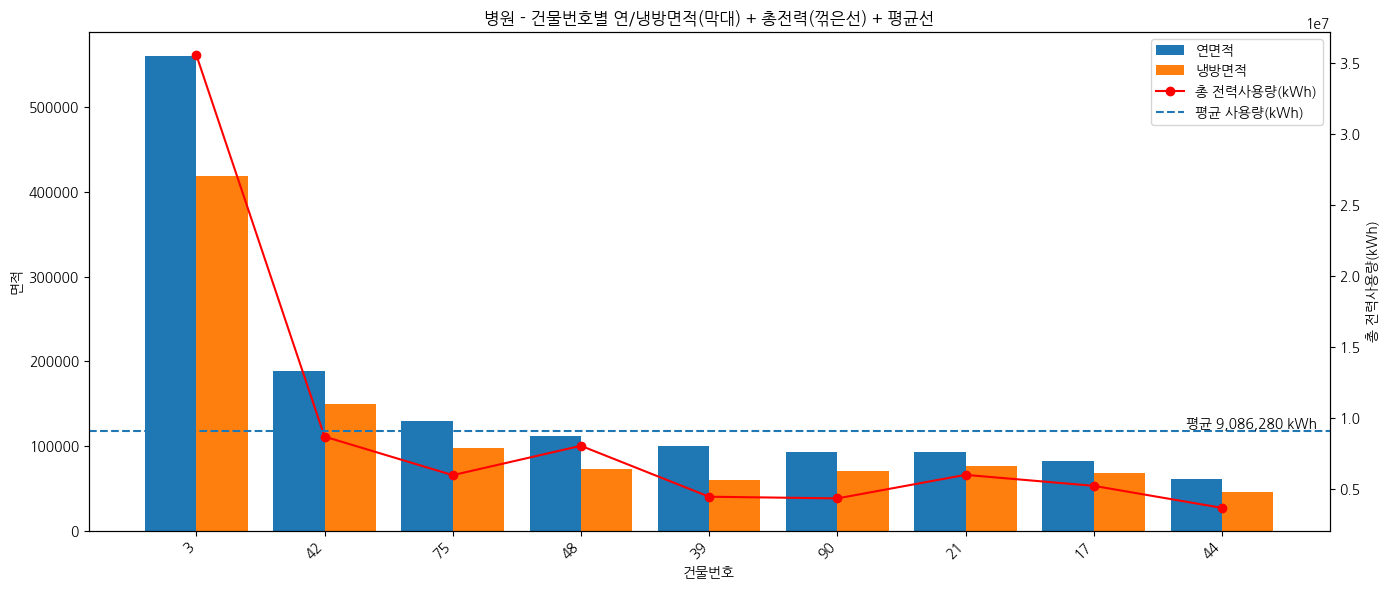

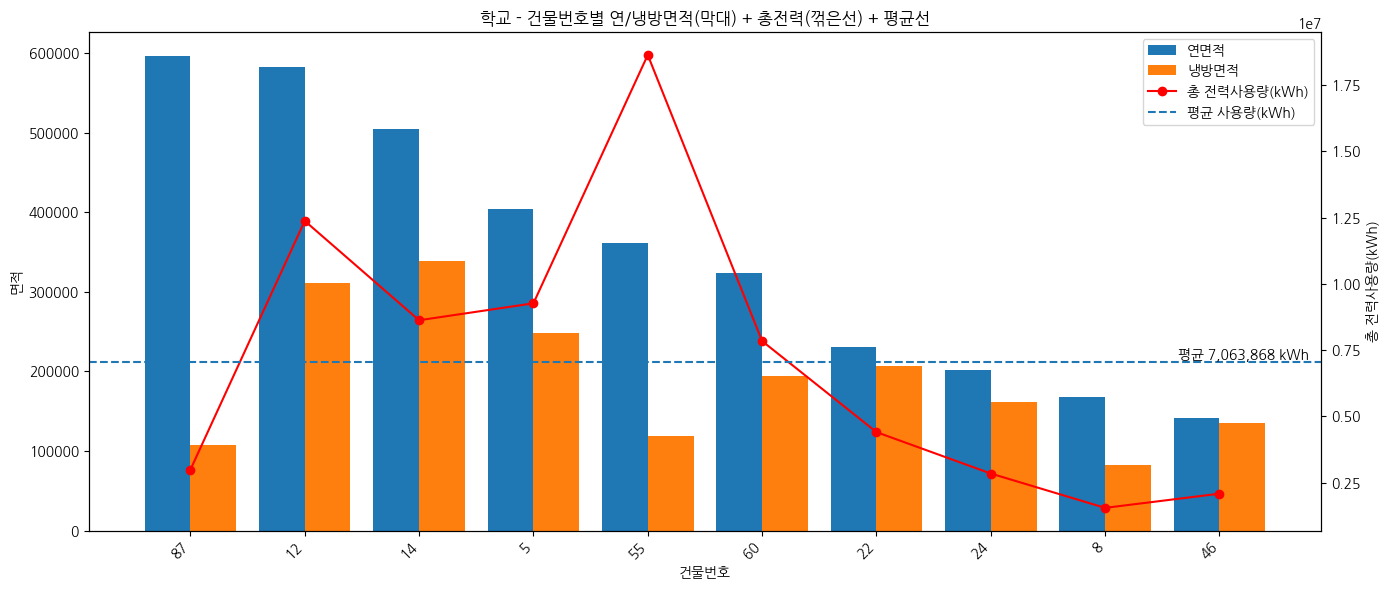

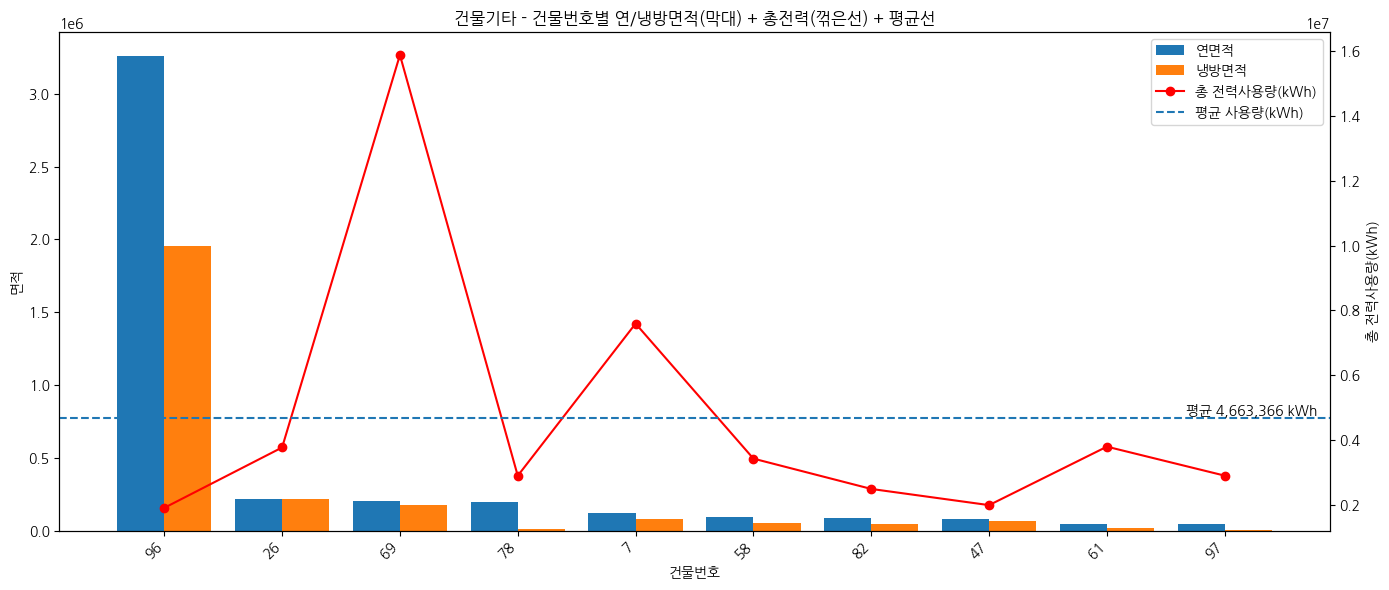

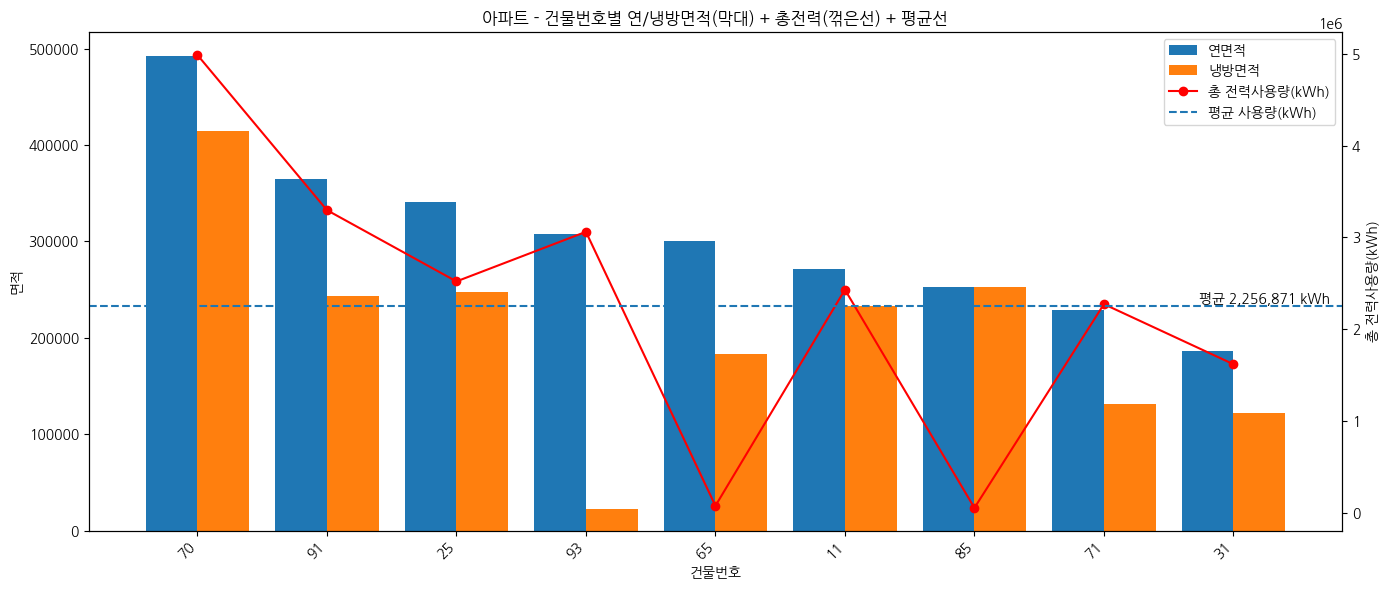

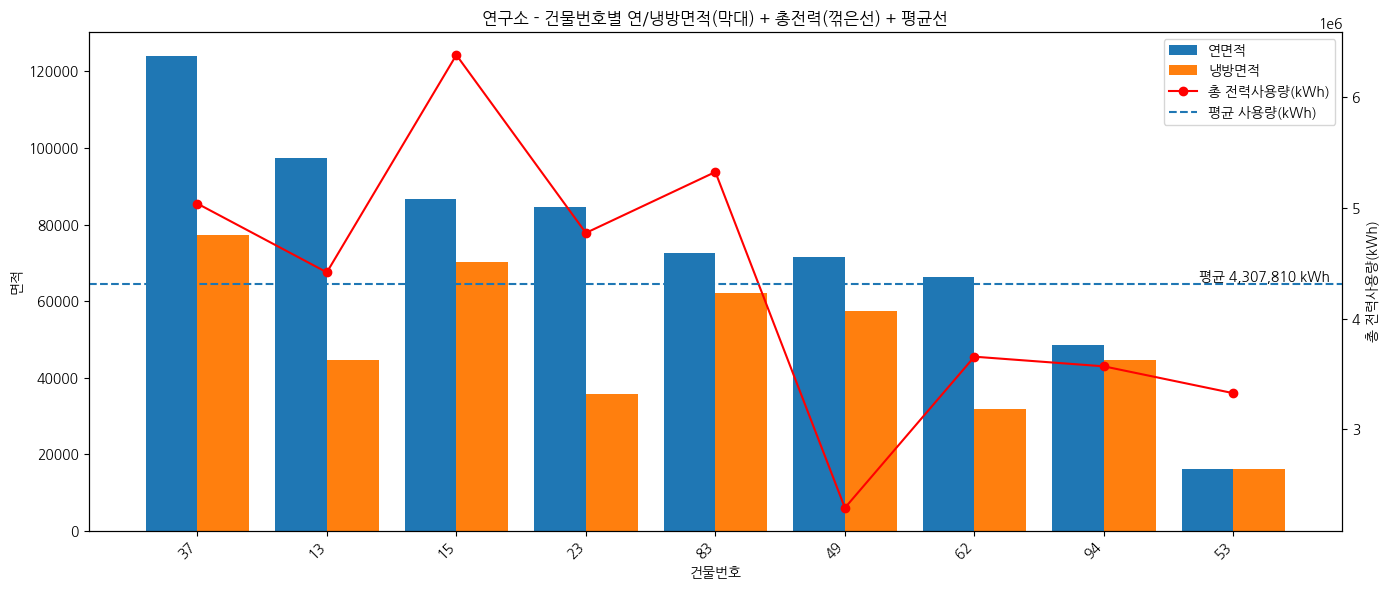

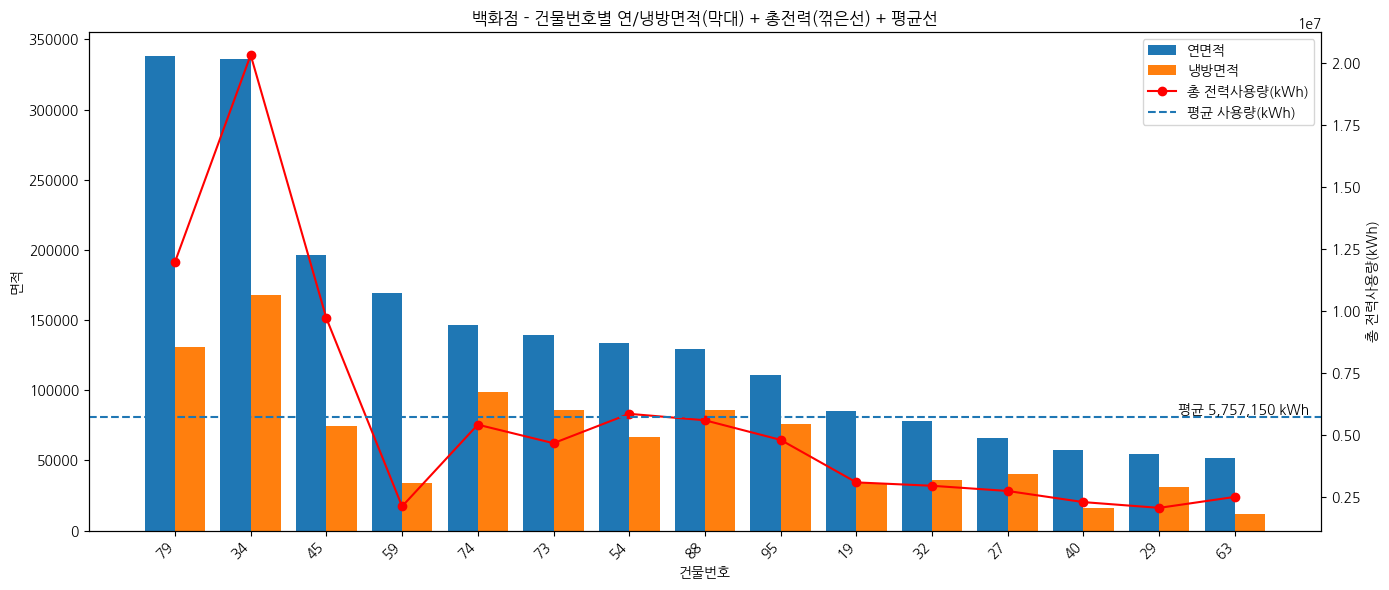

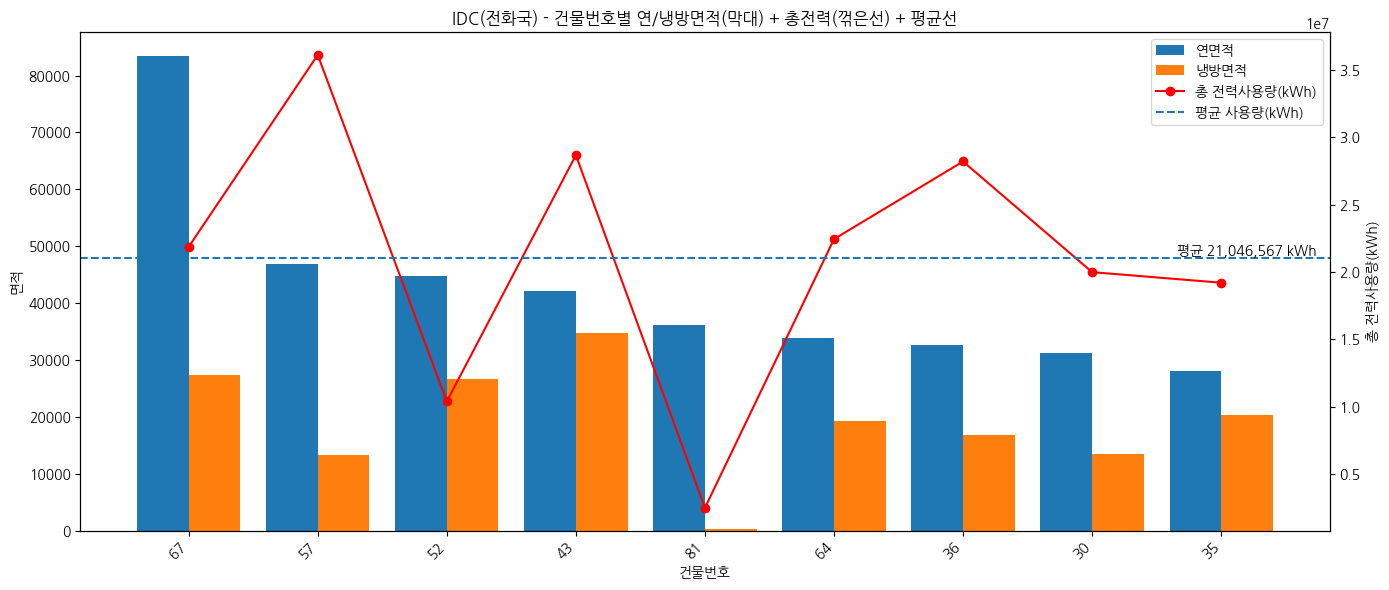

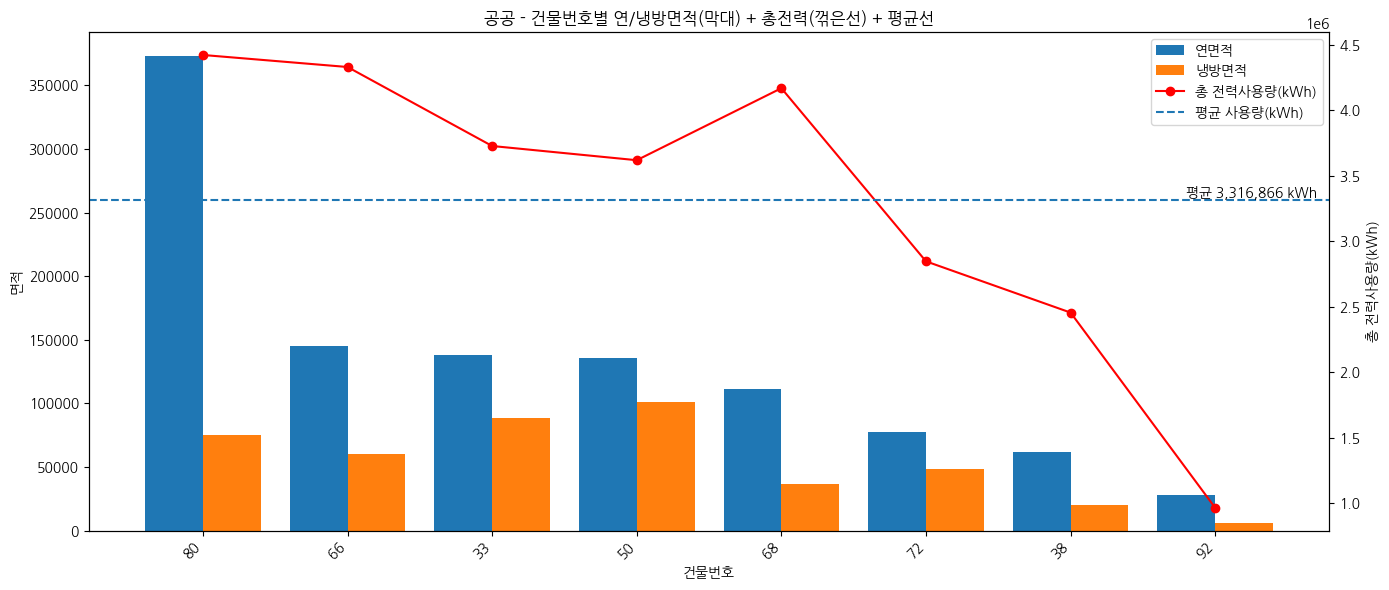

('/mnt/data/building_type_with_kwh_avg_charts.zip',
 '/mnt/data/plots_by_type_with_kwh_avg')

In [ ]:
# -*- coding: utf-8 -*-
import os, re, zipfile
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# ---------- 0) Korean font (best-effort) ----------
installed = {f.name for f in fm.fontManager.ttflist}
for name in ["NanumGothic", "Malgun Gothic", "AppleGothic",
             "Noto Sans CJK KR", "Noto Sans CJK", "NotoSansKR-Regular"]:
    if name in installed:
        mpl.rcParams["font.family"] = name
        break
mpl.rcParams["axes.unicode_minus"] = False

# ---------- 1) Load CSVs ----------
train =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI goorm project1/dataset/train.csv', encoding='utf-8')
bi   =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI goorm project1/dataset/building_info.csv', encoding='utf-8')

# ---------- 2) Column detection ----------
def find_col(cols, patterns):
    for pat in patterns:
        for c in cols:
            if re.search(pat, str(c), flags=re.IGNORECASE):
                return c
    return None

bnum_bi  = find_col(bi.columns,    [r"건물번호", r"building[_\s-]*id", r"건물\s*ID", r"bldg[_\s-]*id"])
bnum_tr  = find_col(train.columns, [r"건물번호", r"building[_\s-]*id", r"건물\s*ID", r"bldg[_\s-]*id"])
btype_col = find_col(bi.columns,   [r"건물\s*유형", r"건물\s*용도", r"유형", r"용도", r"type"])
gfa_col   = find_col(bi.columns,   [r"연\s*면\s*적", r"총\s*면\s*적", r"연면적", r"GFA", r"floor\s*area"])
cool_col  = find_col(bi.columns,   [r"냉\s*방\s*면\s*적", r"냉방면적", r"cool.*area"])
kwh_col   = find_col(train.columns,[r"전력\s*소비\s*량.*kwh", r"전력\s*사용\s*량.*kwh", r"\bkwh\b", r"electric.*(use|consum)", r"power.*(use|consum)"])

if any(c is None for c in [bnum_bi, bnum_tr, btype_col, gfa_col, cool_col, kwh_col]):
    raise ValueError(f"컬럼 자동탐색 실패.\nbi cols: {list(bi.columns)}\ntrain cols: {list(train.columns)}")

# ---------- 3) Prepare merged ----------
for c in [gfa_col, cool_col]:
    bi[c] = pd.to_numeric(bi[c].astype(str).str.replace(",", ""), errors="coerce")
train[kwh_col] = pd.to_numeric(train[kwh_col], errors="coerce")

kwh_by_bld = (train.groupby(bnum_tr)[kwh_col]
                   .sum(min_count=1)
                   .rename("총전력사용량_kWh")
                   .reset_index()
                   .rename(columns={bnum_tr: "건물번호_key"}))

bi_slim = bi[[bnum_bi, btype_col, gfa_col, cool_col]].copy()
bi_slim = bi_slim.rename(columns={bnum_bi: "건물번호_key"})

merged = pd.merge(bi_slim, kwh_by_bld, on="건물번호_key", how="left")
merged["건물번호_key"] = merged["건물번호_key"].astype(str)

# ---------- 4) Plot per type (bars + line + avg line) ----------
out_dir = "/mnt/data/plots_by_type_with_kwh_avg"
os.makedirs(out_dir, exist_ok=True)

def slug(s):
    s = str(s)
    s = re.sub(r"[^\w\-]+", "_", s, flags=re.UNICODE)
    return s[:60]

TOP_N = 15
types = merged[btype_col].dropna().unique().tolist()

for t in types:
    sub = merged[merged[btype_col] == t].copy()
    sub["_sort_key"] = pd.to_numeric(sub[gfa_col], errors="coerce").fillna(0)
    sub = sub.sort_values("_sort_key", ascending=False).drop(columns=["_sort_key"])
    sub_top = sub.head(TOP_N)

    x = np.arange(len(sub_top))
    w = 0.4

    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax1.bar(x - w/2, pd.to_numeric(sub_top[gfa_col], errors="coerce").values, width=w, label="연면적")
    ax1.bar(x + w/2, pd.to_numeric(sub_top[cool_col], errors="coerce").values, width=w, label="냉방면적")
    ax1.set_xlabel("건물번호")
    ax1.set_ylabel("면적")
    ax1.set_xticks(x, sub_top["건물번호_key"].astype(str).values, rotation=45, ha="right")

    # ---- line: total kWh ----
    ax2 = ax1.twinx()
    y_kwh = pd.to_numeric(sub_top["총전력사용량_kWh"], errors="coerce").fillna(0).values
    ax2.plot(x, y_kwh, marker="o", color="red", label="총 전력사용량(kWh)")
    ax2.set_ylabel("총 전력사용량(kWh)")

    # ---- avg line (mean usage) ----
    mean_kwh = pd.to_numeric(sub_top["총전력사용량_kWh"], errors="coerce").mean()
    if pd.notna(mean_kwh):
        ax2.axhline(mean_kwh, linestyle="--", label="평균 사용량(kWh)")
        # optional annotation
        ax2.text(0.99, mean_kwh, f"평균 {mean_kwh:,.0f} kWh",
                 va="bottom", ha="right", transform=ax2.get_yaxis_transform())

    # title & legend
    ax1.set_title(f"{t} - 건물번호별 연/냉방면적(막대) + 총전력(꺾은선) + 평균선")
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc="upper right")

    fig.tight_layout()
    fig.savefig(f"{out_dir}/by_type_with_kwh_avg_{slug(t)}.png", dpi=200)
    plt.show()

# ---------- 5) Zip ----------
zip_path = "/mnt/data/building_type_with_kwh_avg_charts.zip"
with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as zf:
    for fn in os.listdir(out_dir):
        zf.write(os.path.join(out_dir, fn), arcname=f"plots_by_type_with_kwh_avg/{fn}")

zip_path, out_dir


<Axes: xlabel='건물유형', ylabel='전력소비량(kWh)'>

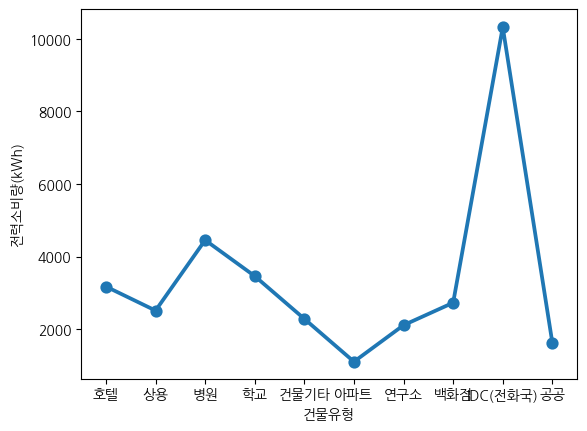

In [ ]:
sns.pointplot(data=df, x='건물유형', y=target, errorbar='se')


In [ ]:
!pip install -q ipywidgets==8.1.2 plotly==5.*
from google.colab import output
output.enable_custom_widget_manager()  # 🔑 위젯 표시 활성화


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.1 MB/s eta 0:00:00


In [ ]:
import ipywidgets as w; w.IntSlider()

IntSlider(value=0)

In [ ]:
# =========================================
# Plotly + ipywidgets 대시보드 (수정본)
# - 1) 건물유형 선택 → 2) 건물번호 선택 → 3) 시간/일/주 단위 시계열
# - 'H' 경고 해결: 소문자 'h' 사용
# - 마지막 출력: display(ui)  ✅
# =========================================
import os, re
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from IPython.display import display
import ipywidgets as widgets

import plotly.io as pio
pio.renderers.default = "colab"

# (Colab일 때 위젯 표시 활성화)
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except Exception:
    pass

# ---------- 1) 데이터 로드 ----------
train =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI goorm project1/dataset/train.csv', encoding='utf-8')
bi   =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI goorm project1/dataset/building_info.csv', encoding='utf-8')

# ---------- 2) 컬럼 자동 탐색 ----------
def find_col(cols, patterns):
    for pat in patterns:
        for c in cols:
            if re.search(pat, str(c), flags=re.IGNORECASE):
                return c
    return None

bnum_tr  = find_col(train.columns, [r"건물번호", r"building[_\s-]*id", r"건물\s*ID", r"bldg[_\s-]*id"])
bnum_bi  = find_col(bi.columns,    [r"건물번호", r"building[_\s-]*id", r"건물\s*ID", r"bldg[_\s-]*id"])
btype_col= find_col(bi.columns,    [r"건물\s*유형", r"건물\s*용도", r"유형", r"용도", r"type"])
time_col = find_col(train.columns, [r"일시", r"date[_\s-]*time", r"timestamp", r"datetime", r"date"])
kwh_col  = find_col(train.columns, [r"전력\s*소비\s*량.*kwh", r"전력\s*사용\s*량.*kwh", r"\bkwh\b", r"electric.*(use|consum)", r"power.*(use|consum)"])

missing = [name for name, col in [
    ("건물번호(train)", bnum_tr), ("건물번호(bi)", bnum_bi), ("건물유형", btype_col),
    ("일시", time_col), ("전력소비량(kWh)", kwh_col)
] if col is None]
assert not missing, f"다음 컬럼을 찾지 못했습니다: {missing}\ntrain cols={list(train.columns)}\nbi cols={list(bi.columns)}"

# ---------- 3) 병합 및 전처리 ----------
train[time_col] = pd.to_datetime(train[time_col], errors="coerce")
train[kwh_col]  = pd.to_numeric(train[kwh_col], errors="coerce")

bi_slim = bi[[bnum_bi, btype_col]].copy().rename(columns={bnum_bi: "건물번호_key"})
df = (train.rename(columns={bnum_tr: "건물번호_key"})
            .merge(bi_slim, on="건물번호_key", how="left"))

df_valid = df.dropna(subset=[time_col, kwh_col, "건물번호_key", btype_col]).copy()
df_valid["건물번호_key"] = df_valid["건물번호_key"].astype(str)
df_valid[btype_col]      = df_valid[btype_col].astype(str)

types = sorted(df_valid[btype_col].unique().tolist())

def bld_options_for(t):
    opts = sorted(df_valid.loc[df_valid[btype_col]==t, "건물번호_key"].unique().tolist())
    return opts if opts else ["(데이터 없음)"]

# ---------- 4) 위젯 ----------
type_dd = widgets.Dropdown(options=types, description="건물유형:", layout=widgets.Layout(width="35%"))
bld_dd  = widgets.Dropdown(options=bld_options_for(types[0] if types else None),
                           description="건물번호:", layout=widgets.Layout(width="35%"))

# ⚠️ 'H' 대신 소문자 'h' 사용
freq_tb = widgets.ToggleButtons(options=[("시간별","h"), ("일별","D"), ("주별","W")],
                                value="h", description="집계:")

# ---------- 5) Plotly FigureWidget ----------
fig = go.FigureWidget(layout=dict(
    height=520, margin=dict(l=50, r=30, t=50, b=40),
    xaxis_title="일시", yaxis_title="전력사용량 (kWh)",
    title="건물별 전력사용량 시계열"
))

# ---------- 6) 콜백 ----------
def update_building_options(change=None):
    new_opts = bld_options_for(type_dd.value)
    bld_dd.options = new_opts
    if bld_dd.value not in new_opts:
        bld_dd.value = new_opts[0] if new_opts else None

def update_figure(change=None):
    t  = type_dd.value
    b  = bld_dd.value
    fq = freq_tb.value               # 'h' / 'D' / 'W'
    label_map = {'h':'시간', 'D':'일', 'W':'주'}

    with fig.batch_update():
        fig.data = []
        if (not t) or (not b) or b == "(데이터 없음)":
            fig.update_layout(title=f"{t} - 데이터 없음")
            return

        sub = df_valid[(df_valid[btype_col]==t) & (df_valid["건물번호_key"]==str(b))]
        if sub.empty:
            fig.update_layout(title=f"{t} / {b} - 데이터 없음")
            return

        ts = (sub.set_index(time_col)[kwh_col]
                .resample(fq)        # ✅ 'h' 사용
                .sum(min_count=1)
                .dropna())
        if ts.empty:
            fig.update_layout(title=f"{t} / {b} - 집계 결과 없음")
            return

        fig.add_scatter(x=ts.index, y=ts.values, mode="lines+markers",
                        name=f"{b} ({label_map[fq]})")
        fig.update_layout(title=f"{t} / 건물번호 {b} - 전력사용량 ({label_map[fq]} 단위)")

# 초기화 & 이벤트 연결
update_building_options()
update_figure()
type_dd.observe(update_building_options, names="value")
type_dd.observe(update_figure,          names="value")
bld_dd.observe(update_figure,           names="value")
freq_tb.observe(update_figure,          names="value")

# ---------- 7) UI 표시 (✅ 여기가 핵심) ----------
ui = widgets.VBox([widgets.HBox([type_dd, bld_dd, freq_tb]), fig])
display(ui)

In [ ]:
print("유형 개수:", len(types))
print("선택 유형의 건물 수:", len(df_valid[df_valid[btype_col]==types[0]]["건물번호_key"].unique()) if types else 0)


유형 개수: 10
선택 유형의 건물 수: 9
